# Import Libraries

In [63]:
import os

from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# import pyarrow.feather as feather

import tensorflow.keras.layers.experimental.preprocessing as tf_preprocessing
import sklearn.preprocessing as skl_preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [64]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
# from torch_utils import EarlyStopping

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))
print(torch.__version__)

True
1
0
NVIDIA GeForce RTX 3090
2.0.1+cu117


In [65]:
# input_root_path = "P:\SALMALIS Lab\Work Zone Dataset"
input_root_path = "E:\OneDrive - UBC\Work Zone\data"
# input_root_path = "C:\\Users\yegmo\OneDrive - UBC\Work Zone\data"
output_root_path = f"../plot/{datetime.now().strftime('%d_%H-%M')}"

os.makedirs(output_root_path, exist_ok=True)

# Load Dataset

In [66]:
# df = feather.read_feather(os.path.join(input_root_path, 'TravelTime_Valid_Recom_Weather_Traffic.ftr'))
# df = pd.read_csv(os.path.join(input_root_path, 'TravelTime_Valid_Recom_Weather_Traffic.csv'))
# df

In [67]:
# Get No Cell Coverage Area Assets
# assets_no_cell = pd.read_csv(os.path.join(input_root_path, 'NoCellAssets.csv'))['Asset Number'].tolist()

# df[df['AssetNumber'].isin(assets_no_cell)].to_csv(os.path.join(input_root_path, 'TravelTime_NoCellCoverage.csv'))
# feather.write_feather(df[df['AssetNumber'].isin(assets_no_cell)], os.path.join(input_root_path, 'TravelTime_NoCellCoverage.ftr'))

# Remove no cell coverage records from data frame
# df = df[~df['AssetNumber'].isin(assets_no_cell)]
# df

# df.to_csv(os.path.join(input_root_path, 'TravelTime_HaveCellCoverage.csv'))
# feather.write_feather(df, os.path.join(input_root_path, 'TravelTime_HaveCellCoverage.ftr'))

In [68]:
# df = feather.read_feather(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage.ftr'))
df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage_WeatherFillNaN.csv'))
df = df.drop(df.columns[0], axis=1)
df

C:\Users\yegmo\AppData\Local\Temp\ipykernel_18348\3153451852.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(input_root_path, 'TravelTimeInfo\TravelTime_HaveCellCoverage_WeatherFillNaN.csv'))


AssetNumber                                 AssetIdentifier  \
0        49831911074                                       Spread 3B   
1        49831911074                                       Spread 3B   
2        49831911074                                       Spread 3B   
3        49831911074                                       Spread 3B   
4        49831911074                                       Spread 3B   
...              ...                                             ...   
1704313  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   
1704314  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   
1704315  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   
1704316  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   
1704317  86704972236  AP 6-A-66-A • NB • Macro Spiecapag JV • 1073.6   

                 CreatedDate  UnderConstructionTime  BaselineTime  DelayTime  \
0        2022-05-03 17:59:55                   2.20          2.13       0.07   
1        2022-05-03 17:57:32                   2.20          2.13       0.07   
2        2022-05-03 17:55:23                   2.20          2.13       0.07   
3        2022-05-03 17:53:29                   2.20          2.13       0.07   
4        2022-05-03 17:51:45                   2.23          2.13       0.10   
...                      ...                    ...           ...        ...   
1704313  2021-05-01 18:40:12                   1.38          1.48       0.00   
1704314  2021-05-01 18:45:11                   1.38          1.48       0.00   
1704315  2021-05-01 18:50:10                   1.38          1.48       0.00   
1704316  2021-05-01 18:51:07                   1.37          1.48       0.00   
1704317  2021-05-01 18:55:09                   1.37          1.48       0.00   

        State  SegmentLength TravelDirect     Spread  ... Weather:Lat  \
0          OK           3.36           SB  Spread 3B  ...       52.72   
1          OK           3.36           SB  Spread 3B  ...       52.72   
2          OK           3.36           SB  Spread 3B  ...       52.72   
3          OK           3.36           SB  Spread 3B  ...       52.72   
4          OK           3.36           SB  Spread 3B  ...       52.72   
...       ...            ...          ...        ...  ...         ...   
1704313    OK           2.45           NB  Spread 5B  ...       49.24   
1704314    OK           2.45           NB  Spread 5B  ...       49.24   
1704315    OK           2.45           NB  Spread 5B  ...       49.24   
1704316    OK           2.45           NB  Spread 5B  ...       49.24   
1704317    OK           2.45           NB  Spread 5B  ...       49.24   

        Weather:Temp Weather:Precip Weather:WindSpd  Traffic:SiteNo  \
0                9.5            0.0             3.0        23-010NS   
1                9.5            0.0             3.0        23-010NS   
2                9.5            0.0             3.0        23-010NS   
3                9.5            0.0             3.0        23-010NS   
4                9.5            0.0             3.0        23-010NS   
...              ...            ...             ...             ...   
1704313         14.2            0.0             6.0         17-015W   
1704314         14.2            0.0             6.0         17-015W   
1704315         14.2            0.0             6.0         17-015W   
1704316         14.2            0.0             6.0         17-015W   
1704317         14.2            0.0             6.0         17-015W   

         Traffic:IsTemporary  Traffic:AADT  Traffic:BaseYear  \
0                       True    355.333333            2017.0   
1                       True    355.333333            2017.0   
2                       True    355.333333            2017.0   
3                       True    355.333333            2017.0   
4                       True    355.333333            2017.0   
...                      ...           ...               ...   
17043

In [69]:
df.nunique()

AssetNumber                   274
AssetIdentifier               132
CreatedDate                495632
UnderConstructionTime         576
BaselineTime                  275
DelayTime                     635
State                           2
SegmentLength                 133
TravelDirect                    2
Spread                          7
TrafficImpact                   3
RoadType                        3
TrafficControlSetup             2
CreatedDate:Date              171
CreatedDate:Weekday             7
CreatedDate:DayOfYear         107
CreatedDate:Year                2
CreatedDate:Month               4
CreatedDate:Day                31
CreatedDate:Hour               24
CreatedDate:MinuteInDay      1440
CreatedDate:Season              2
Weather:StationID              12
Weather:Long                   11
Weather:Lat                    12
Weather:Temp                  368
Weather:Precip                 49
Weather:WindSpd                39
Traffic:SiteNo                 16
Traffic:IsTemp

In [70]:
df_features = pd.read_excel(os.path.join(input_root_path, 'Layout Plans\Weekly Approved H1080 TCPs\Work Zone Features.xlsx'), sheet_name=0)
df_features = df_features.drop(df_features.index[0]).reset_index(drop=True).infer_objects()
df_features

WZ_ID  AssetNumber Direction  WZ_Hwy  Anticipated AADT (Veh/Day)  \
0     AP 4-B-17-A  78385678679        NB     5.0                      2872.0   
1     AP 4-B-17-A  70353237409        SB     5.0                      2872.0   
2    AP 4-B-144-A  11297073233        NB     5.0                      2872.0   
3    AP 4-B-144-A  42238078130        SB     5.0                      2872.0   
4    AP 4-B-145-A  11297073233        NB     5.0                      2872.0   
..            ...          ...       ...     ...                         ...   
220   AP 3-C-77-C  17960997656        SB     5.0                      3151.0   
221   AP 3-C-77-C  48287165966        NB     5.0                      3151.0   
222   AP 3-C-77-C  17960997656        SB     5.0                      3151.0   
223   AP 4-A-51-E  38283143270        NB     5.0                      3255.0   
224   AP 4-A-51-E  20254556742        SB     5.0                      3255.0   

     Anticipated AADT Year  PostedSpd  WZ_IsBidirectional  \
0                   2017.0        100                   0   
1                   2017.0        100                   0   
2                   2017.0        100                   0   
3                   2017.0        100                   0   
4                   2017.0        100                   0   
..                     ...        ...                 ...   
220                 2017.0        100                   0   
221                 2017.0        100                   1   
222                 2017.0        100                   1   
223                 2019.0        100                   1   
224                 2019.0        100                   1   

     WZ_ConstSignSpdLimDist  WZ_TransLenStart  ...  WZ_NewLaneCount  \
0                       150               450  ...                1   
1                       150               450  ...                1   
2                       150               450  ...                1   
3                       150               450  ...                1   
4                       150               450  ...                1   
..                      ...               ...  ...              ...   
220                     300               450  ...                1   
221                     150               150  ...                1   
222                     150               150  ...                1   
223                     150               150  ...                1   
224                     150               150  ...                1   

    WZ_ClosedLaneCount  WZ_IsMinAprch  WZ_BarrelSpace  \
0                    0              0               0   
1                    0              0               0   
2                    0              0               0   
3                    0              0               0   
4                    0              0               0   
..                 ...            ...             ...   
220                  0              0               0   
221                  1              0             335   
222                  1              0             335   
223                  1              0             335   
224                  1              0             335   

                                                Folder  \
0    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
1    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
2    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
3    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
4    Weekly Approved H1080 TCPs\2022\April 4 - 8\Sp...   
..                                                 ...   
220  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   
221  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   
222  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   
223  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   
224  Weekly Approved H1080 TCPs\2022\3_March 14 - 1...   

                                     Filename  Entered by  Additional Plan  \
0    

In [71]:
df_features.nunique()

WZ_ID                          66
AssetNumber                   123
Direction                       2
WZ_Hwy                          2
Anticipated AADT (Veh/Day)      7
Anticipated AADT Year           3
PostedSpd                       1
WZ_IsBidirectional              2
WZ_ConstSignSpdLimDist          2
WZ_TransLenStart                2
WZ_2ndTransLenStart             6
WZ_Length                      10
WZ_Length_Lower                10
WZ_Length_Upper                 9
WZ_TransLenEnd                  9
WZ_SpdLim                       2
WZ_TransSpd                     2
WZ_IsPrepStop                   1
WZ_ThxSignSpdLimDist            2
WZ_OrigLaneCount                2
WZ_IsOrigIDivided               2
WZ_NewLaneCount                 2
WZ_ClosedLaneCount              2
WZ_IsMinAprch                   2
WZ_BarrelSpace                  5
Folder                         10
 Filename                      99
Entered by                      2
Additional Plan                 1
Comments 1    

# Prepare data to feed the network

## Filter Data

In [72]:
df_filtered = df[#(91 <= df['CreatedDate:DayOfYear']) & (df['CreatedDate:DayOfYear'] <= 100) &
                 (df['CreatedDate:Year'] == 2022)].reset_index(drop=True)
# df_filtered = df[(df['CreatedDate:Year'] == 2022)].reset_index(drop=True)
# df_filtered = df_filtered[(df_filtered['UnderConstructionTime'] < 7) & (df_filtered['BaselineTime'] < 10)].reset_index(drop=True)

# pd.DataFrame(df_filtered['AssetNumber'].unique()).to_csv("E:\OneDrive - UBC\Work Zone\data\TravelTimeInfo\Assets_HaveCellCoverage_April_1-10.csv")
# df_filtered.to_csv("E:\OneDrive - UBC\Work Zone\data\TravelTimeInfo\TravelTime_HaveCellCoverage_April_1-10.csv")

df_filtered

AssetNumber AssetIdentifier          CreatedDate  \
0        49831911074       Spread 3B  2022-05-03 17:59:55   
1        49831911074       Spread 3B  2022-05-03 17:57:32   
2        49831911074       Spread 3B  2022-05-03 17:55:23   
3        49831911074       Spread 3B  2022-05-03 17:53:29   
4        49831911074       Spread 3B  2022-05-03 17:51:45   
...              ...             ...                  ...   
1115134  36670484962       Spread 5B  2022-05-09 12:01:28   
1115135  36670484962       Spread 5B  2022-05-09 11:58:38   
1115136  36670484962       Spread 5B  2022-05-09 11:56:41   
1115137  36670484962       Spread 5B  2022-05-09 11:54:44   
1115138  36670484962       Spread 5B  2022-05-09 11:52:39   

         UnderConstructionTime  BaselineTime  DelayTime State  SegmentLength  \
0                         2.20          2.13       0.07    OK          3.360   
1                         2.20          2.13       0.07    OK          3.360   
2                         2.20          2.13       0.07    OK          3.360   
3                         2.20          2.13       0.07    OK          3.360   
4                         2.23          2.13       0.10    OK          3.360   
...                        ...           ...        ...   ...            ...   
1115134                   3.12          3.37       0.00    OK          5.506   
1115135                   3.10          3.37       0.00    OK          5.506   
1115136                   3.13          3.37       0.00    OK          5.506   
1115137                   3.13          3.37       0.00    OK          5.506   
1115138                   3.12          3.37       0.00    OK          5.506   

        TravelDirect     Spread  ... Weather:Lat Weather:Temp Weather:Precip  \
0                 SB  Spread 3B  ...       52.72          9.5            0.0   
1                 SB  Spread 3B  ...       52.72          9.5            0.0   
2                 SB  Spread 3B  ...       52.72          9.5            0.0   
3                 SB  Spread 3B  ...       52.72          9.5            0.0   
4                 SB  Spread 3B  ...       52.72          9.5            0.0   
...              ...        ...  ...         ...          ...            ...   
1115134           NB  Spread 5B  ...       49.28          8.2            0.0   
1115135           NB  Spread 5B  ...       49.28          9.0            0.0   
1115136           NB  Spread 5B  ...       49.28          9.0            0.0   
1115137           NB  Spread 5B  ...       49.28          9.0            0.0   
1115138           NB  Spread 5B  ...       49.28          9.0            0.0   

        Weather:WindSpd  Traffic:SiteNo  Traffic:IsTemporary  Traffic:AADT  \
0                   3.0        23-010NS                 True    355.333333   
1                   3.0        23-010NS                 True    355.333333   
2                   3.0        23-010NS                 True    355.333333   
3                   3.0        23-010NS                 True    355.333333   
4                   3.0        23-010NS                 True    355.333333   
...                 ...             ...                  ...           ...   
1115134            15.0        P-17-8NS                  NaN           NaN   
1115135            14.0        P-17-8NS                  NaN           NaN   
1115136            14.0        P-17-8NS                  NaN           NaN   
1115137            14.0        P-17-8NS                  NaN           NaN   
1115138            14.0        P-17-8NS                  NaN           NaN   

         Traffic:BaseYear  Traffic:CalculatedAADT  MaxSpeed  
0                  2017.0                   373.1     100.0  
1                  2017.0                   373.1     100.0  
2                  2017.0                   373.1     100.0  
3                  2017.0                   373.1     100.0  
4                  2017.0                   373.1     100.0  
...                   ...                    

In [73]:
df_filtered.nunique()

AssetNumber                   230
AssetIdentifier                 7
CreatedDate                420900
UnderConstructionTime         572
BaselineTime                  258
DelayTime                     620
State                           2
SegmentLength                 114
TravelDirect                    2
Spread                          7
TrafficImpact                   3
RoadType                        3
TrafficControlSetup             2
CreatedDate:Date               73
CreatedDate:Weekday             7
CreatedDate:DayOfYear          73
CreatedDate:Year                1
CreatedDate:Month               4
CreatedDate:Day                31
CreatedDate:Hour               24
CreatedDate:MinuteInDay      1439
CreatedDate:Season              2
Weather:StationID              12
Weather:Long                   11
Weather:Lat                    12
Weather:Temp                  321
Weather:Precip                 42
Weather:WindSpd                38
Traffic:SiteNo                 15
Traffic:IsTemp

## Merge features and then remove records with null features

In [74]:
df_processed = pd.merge(df_filtered, df_features, on='AssetNumber', how='inner')
drop_cols = ['AssetIdentifier', 'CreatedDate', 'State', 'CreatedDate:Date', 'Weather:StationID', 'Weather:Long',
             'Weather:Lat', 'Traffic:SiteNo', 'Traffic:IsTemporary', 'Traffic:AADT', 'Traffic:BaseYear', 'MaxSpeed',
             'Traffic:CalculatedAADT',
             'Entered by', 'Additional Plan', 'Comments 1', 'Comments 2']
df_processed = df_processed.drop(columns=drop_cols)
df_processed = df_processed.drop(columns=['WZ_Length_Upper', 'WZ_Length'])
df_processed.rename(columns={'WZ_Length_Lower': 'WZ_Length'}, inplace=True)
# df_processed[df_processed.isnull().any(axis=1)]
# df_processed.isnull().sum()
df_processed = df_processed.dropna(axis=0).reset_index(drop=True).copy()
df_processed

AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0       49831911074                   2.20          2.13       0.07   
1       49831911074                   2.20          2.13       0.07   
2       49831911074                   2.20          2.13       0.07   
3       49831911074                   2.20          2.13       0.07   
4       49831911074                   2.20          2.13       0.07   
...             ...                    ...           ...        ...   
485778  96377892188                   2.22          2.18       0.04   
485779  96377892188                   2.22          2.18       0.04   
485780  96377892188                   2.22          2.18       0.04   
485781  96377892188                   2.22          2.18       0.04   
485782  96377892188                   2.38          2.18       0.20   

        SegmentLength TravelDirect     Spread TrafficImpact  \
0                3.36           SB  Spread 3B          High   
1                3.36           SB  Spread 3B          High   
2                3.36           SB  Spread 3B          High   
3                3.36           SB  Spread 3B          High   
4                3.36           SB  Spread 3B          High   
...               ...          ...        ...           ...   
485778           3.63           NB  Spread 4B          High   
485779           3.63           NB  Spread 4B          High   
485780           3.63           NB  Spread 4B          High   
485781           3.63           NB  Spread 4B          High   
485782           3.63           NB  Spread 4B          High   

                                     RoadType TrafficControlSetup  ...  \
0       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                       ...                 ...  ...   
485778  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485779  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485780  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485781  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485782  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

        WZ_IsPrepStop  WZ_ThxSignSpdLimDist  WZ_OrigLaneCount  \
0                   1                  75.0                 1   
1                   1                  75.0                 1   
2                   1                  75.0                 1   
3                   1                  75.0                 1   
4                   1                  75.0                 1   
...               ...                   ...               ...   
485778              1                  75.0                 1   
485779              1                  75.0                 1   
485780              1                  75.0                 1   
485781              1                  75.0                 1   
485782              1                  75.0                 1   

        WZ_IsOrigIDivided  WZ_NewLaneCount  WZ_ClosedLaneCount  WZ_IsMinAprch  \
0                       1                1                   1              0   
1                       1                1                   1              0   
2                       1                1                   1              0   
3                       1                1                   1              0   
4                       1                1                   1              0   
...                   ...              ...                 ...            ...   
485778                  0                1                   0              0   
485779                  0                1                   0              0   

### Check merged df

In [75]:
df_processed.nunique()


AssetNumber                     81
UnderConstructionTime          408
BaselineTime                    57
DelayTime                      427
SegmentLength                   47
TravelDirect                     2
Spread                           4
TrafficImpact                    2
RoadType                         2
TrafficControlSetup              1
CreatedDate:Weekday              6
CreatedDate:DayOfYear           60
CreatedDate:Year                 1
CreatedDate:Month                4
CreatedDate:Day                 30
CreatedDate:Hour                24
CreatedDate:MinuteInDay       1087
CreatedDate:Season               2
Weather:Temp                   244
Weather:Precip                  24
Weather:WindSpd                 26
WZ_ID                           43
Direction                        2
WZ_Hwy                           1
Anticipated AADT (Veh/Day)       5
Anticipated AADT Year            2
PostedSpd                        1
WZ_IsBidirectional               2
WZ_ConstSignSpdLimDi

In [76]:
# import sweetviz as sv
#
# eda_report = sv.analyze(df_processed.drop(columns='WZ_Length'))
# eda_report.show_notebook(filepath='sweetviz_report.html')

In [77]:
# all = df_filtered['AssetNumber'].unique()
# got = df_processed['AssetNumber'].unique()
# want = all[~np.isin(all, got)]
#
# assets = pd.read_csv(os.path.join(input_root_path, 'AssetInfo\\unique_assets_full_info.csv'))
# # df_filtered[df_filtered['AssetNumber'].isin(want)]
# pd.DataFrame(want).to_csv('where_are_you2.csv')

# Process features

In [78]:
GROWTH_RATE = 0.01
df_processed['WZ_CalculatedAADT'] = df_processed['Anticipated AADT (Veh/Day)'] * (
            1 + (GROWTH_RATE * (df_processed['CreatedDate:Year'] - df_processed['Anticipated AADT Year'])))

In [79]:
df_processed['CreatedDate:Season_Code'] = df_processed['CreatedDate:Month'] % 12 // 3 + 1

In [80]:
df_processed['TravelDirect_Code'] = np.where(df_processed['TravelDirect'] == 'NB', 1, 0)

In [81]:
drop_cols = ['WZ_ID', 'Direction', 'Anticipated AADT (Veh/Day)', 'Anticipated AADT Year', 'Folder', ' Filename']
df_processed = df_processed.drop(columns=drop_cols)
df_processed

AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0       49831911074                   2.20          2.13       0.07   
1       49831911074                   2.20          2.13       0.07   
2       49831911074                   2.20          2.13       0.07   
3       49831911074                   2.20          2.13       0.07   
4       49831911074                   2.20          2.13       0.07   
...             ...                    ...           ...        ...   
485778  96377892188                   2.22          2.18       0.04   
485779  96377892188                   2.22          2.18       0.04   
485780  96377892188                   2.22          2.18       0.04   
485781  96377892188                   2.22          2.18       0.04   
485782  96377892188                   2.38          2.18       0.20   

        SegmentLength TravelDirect     Spread TrafficImpact  \
0                3.36           SB  Spread 3B          High   
1                3.36           SB  Spread 3B          High   
2                3.36           SB  Spread 3B          High   
3                3.36           SB  Spread 3B          High   
4                3.36           SB  Spread 3B          High   
...               ...          ...        ...           ...   
485778           3.63           NB  Spread 4B          High   
485779           3.63           NB  Spread 4B          High   
485780           3.63           NB  Spread 4B          High   
485781           3.63           NB  Spread 4B          High   
485782           3.63           NB  Spread 4B          High   

                                     RoadType TrafficControlSetup  ...  \
0       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                       ...                 ...  ...   
485778  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485779  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485780  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485781  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485782  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

        WZ_ThxSignSpdLimDist  WZ_OrigLaneCount  WZ_IsOrigIDivided  \
0                       75.0                 1                  1   
1                       75.0                 1                  1   
2                       75.0                 1                  1   
3                       75.0                 1                  1   
4                       75.0                 1                  1   
...                      ...               ...                ...   
485778                  75.0                 1                  0   
485779                  75.0                 1                  0   
485780                  75.0                 1                  0   
485781                  75.0                 1                  0   
485782                  75.0                 1                  0   

        WZ_NewLaneCount  WZ_ClosedLaneCount  WZ_IsMinAprch  WZ_BarrelSpace  \
0                     1                   1              0            1050   
1                     1                   1              0            1050   
2                     1                   1              0            1050   
3                     1                   1              0            1050   
4                     1                   1              0            1050   
...                 ...                 ...            ...             ...   
485778                1                   0              0               0   
485779                1                   0             

## Plot

### Correlation Matrix

In [82]:
df_numeric = df_processed.select_dtypes(include=np.number)
df_numeric = df_numeric.drop(columns=['AssetNumber', 'CreatedDate:Year', 'WZ_Hwy', 'PostedSpd', 'WZ_IsPrepStop', 'WZ_NewLaneCount'])

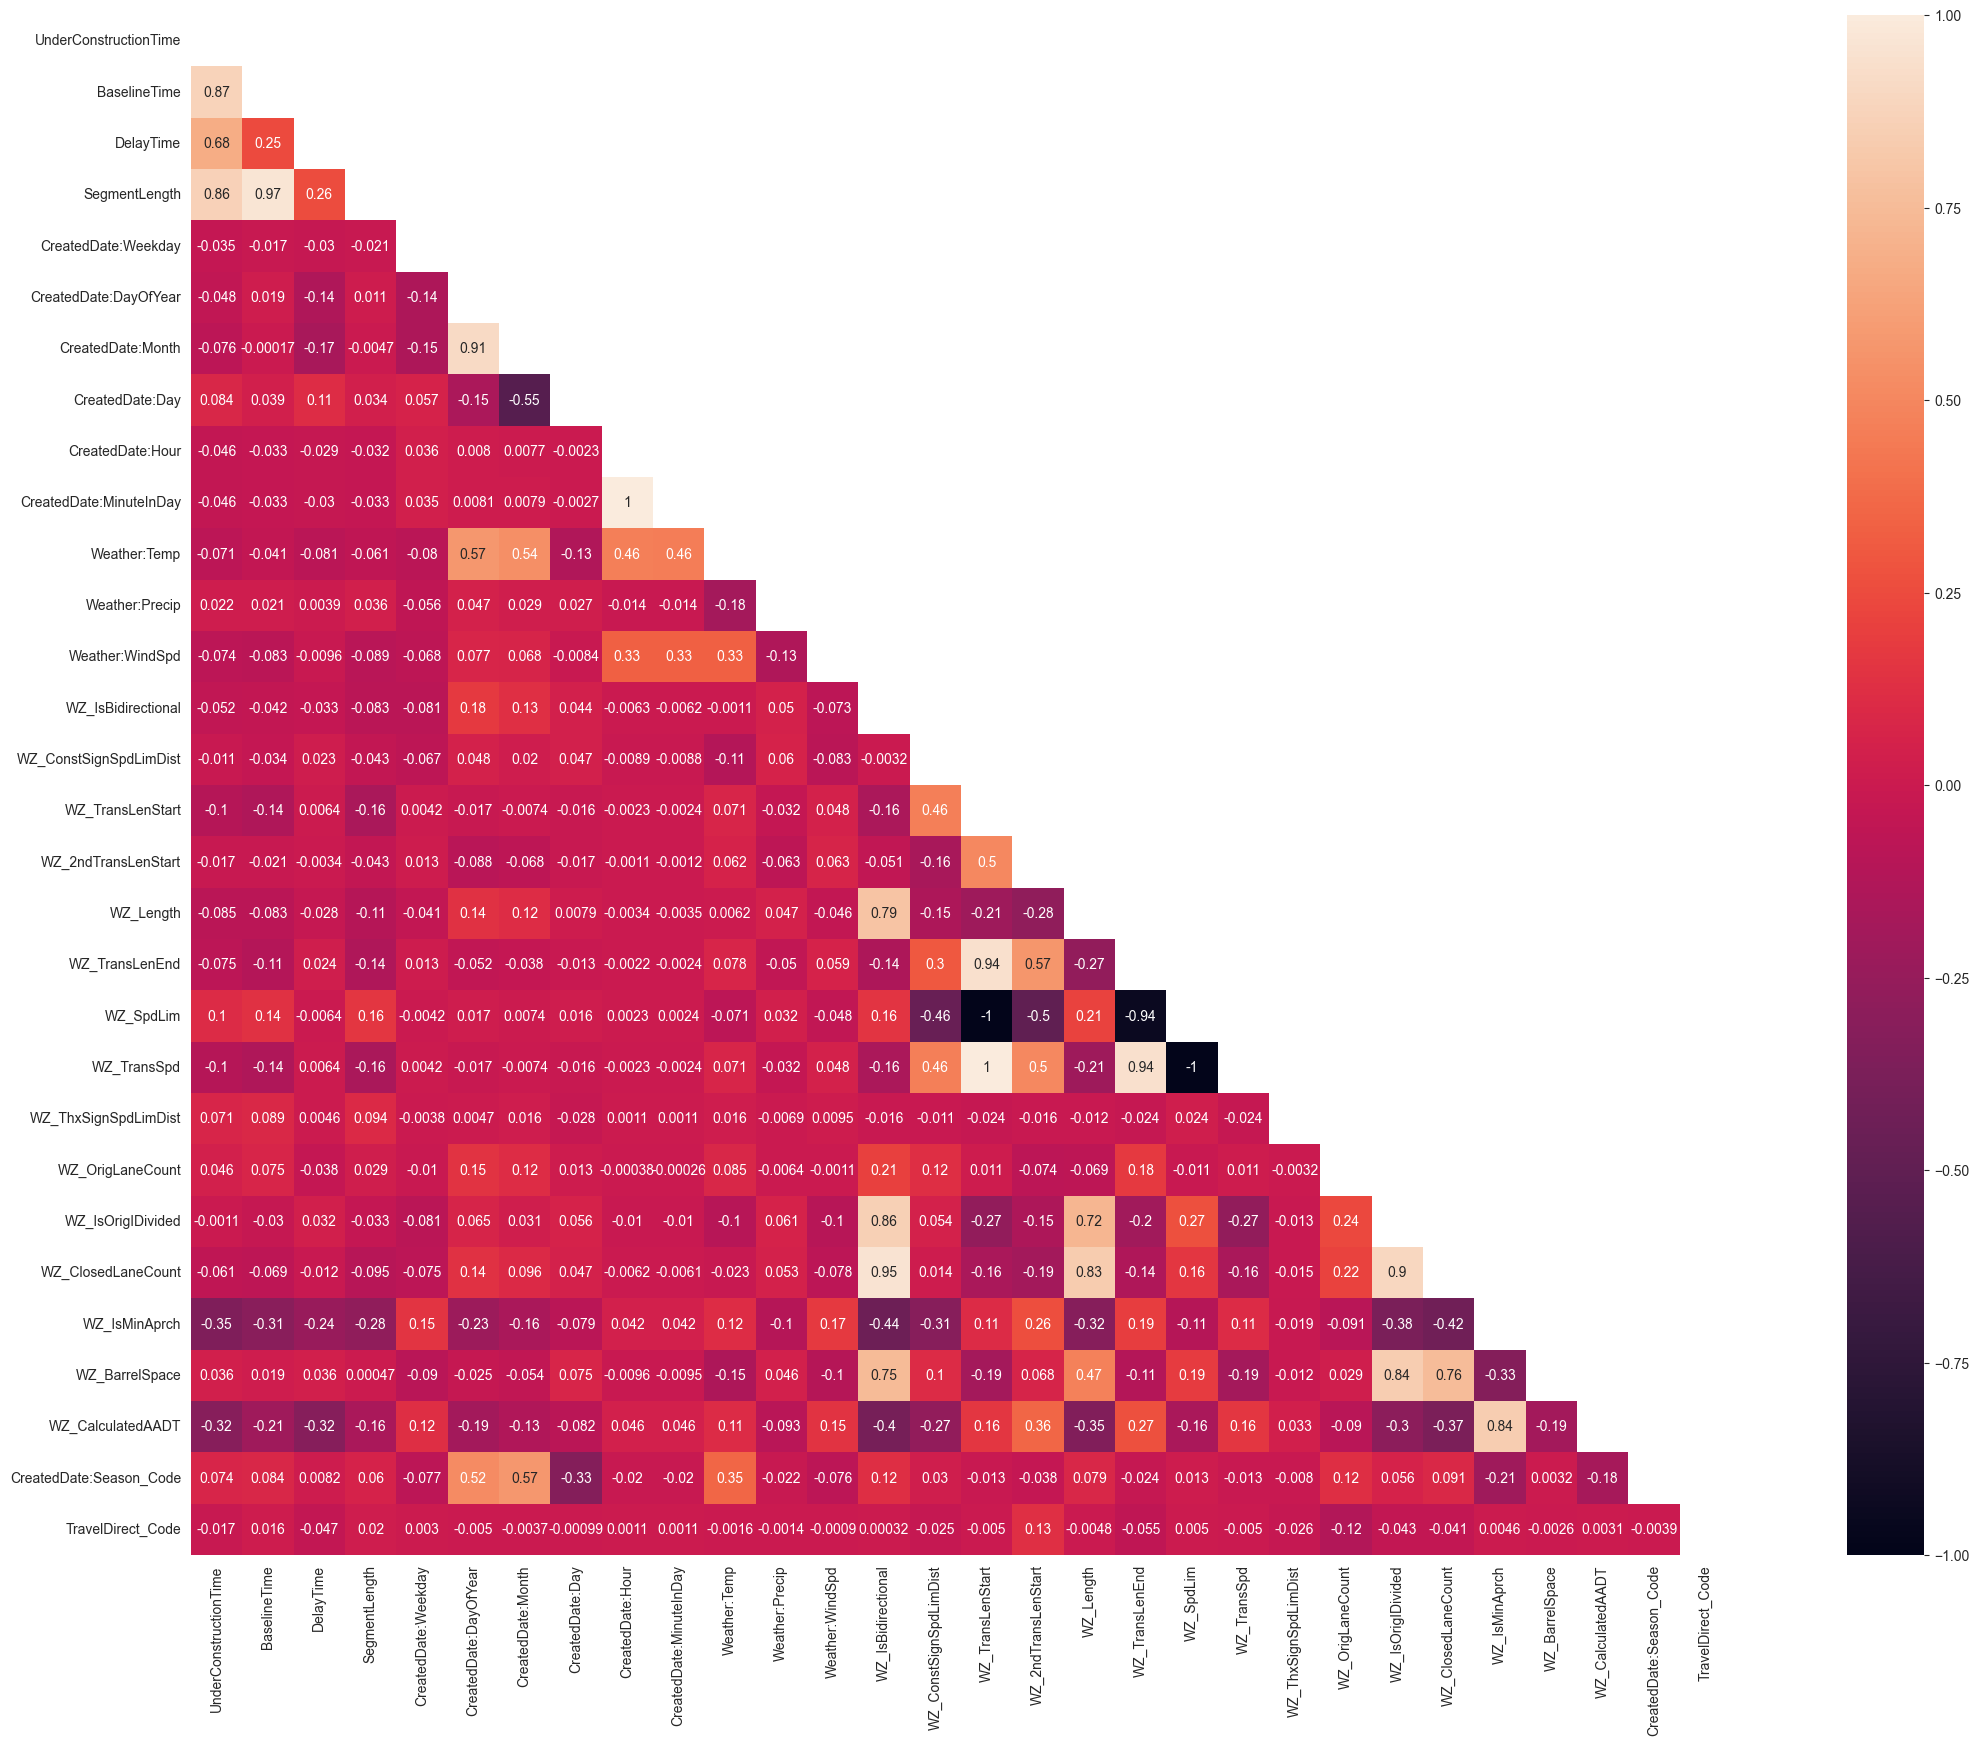

In [83]:
corr_mat = df_numeric.corr()
mask = np.triu(np.ones_like(corr_mat))
fig = plt.figure(figsize=(30, 20))
sns.heatmap(corr_mat, mask=mask, annot=True, square=True)
plt.show()
fig.savefig(os.path.join(output_root_path, 'correlation_matrix.png'))

### Box plot

In [84]:
df_numeric.columns

Index(['UnderConstructionTime', 'BaselineTime', 'DelayTime', 'SegmentLength',
       'CreatedDate:Weekday', 'CreatedDate:DayOfYear', 'CreatedDate:Month',
       'CreatedDate:Day', 'CreatedDate:Hour', 'CreatedDate:MinuteInDay',
       'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd',
       'WZ_IsBidirectional', 'WZ_ConstSignSpdLimDist', 'WZ_TransLenStart',
       'WZ_2ndTransLenStart', 'WZ_Length', 'WZ_TransLenEnd', 'WZ_SpdLim',
       'WZ_TransSpd', 'WZ_ThxSignSpdLimDist', 'WZ_OrigLaneCount',
       'WZ_IsOrigIDivided', 'WZ_ClosedLaneCount', 'WZ_IsMinAprch',
       'WZ_BarrelSpace', 'WZ_CalculatedAADT', 'CreatedDate:Season_Code',
       'TravelDirect_Code'],
      dtype='object')

In [85]:
df_numeric = df_numeric.drop(columns=['WZ_OrigLaneCount', 'WZ_IsOrigIDivided', 'WZ_ClosedLaneCount', 'WZ_IsMinAprch', 'WZ_IsBidirectional', 'WZ_TransSpd'])

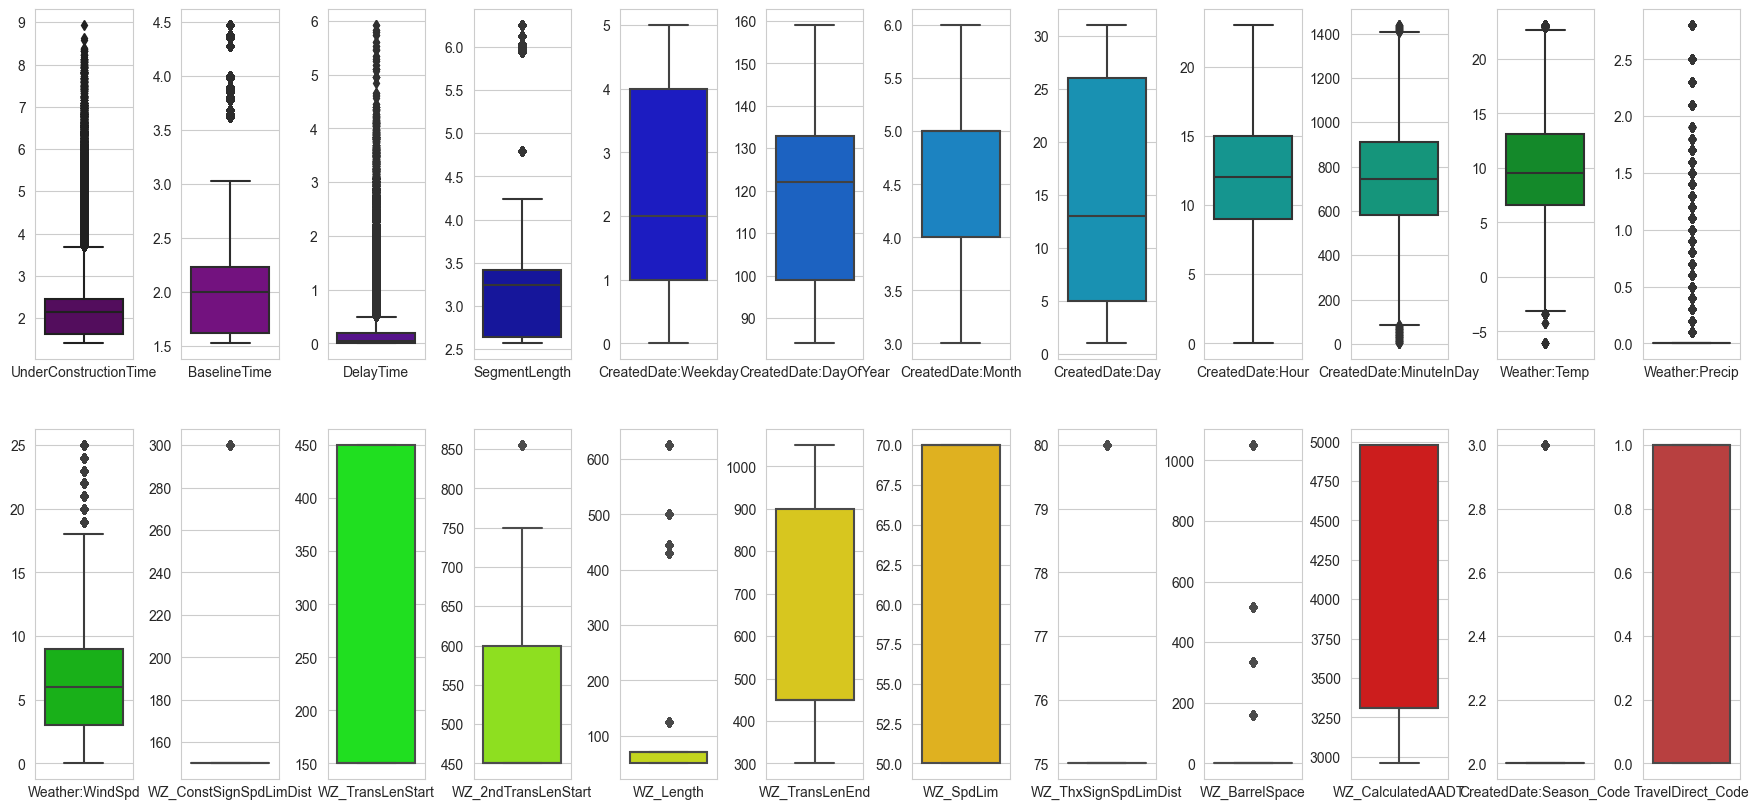

In [86]:
num_rows = 2
fig, ax = plt.subplots(num_rows, len(df_numeric.columns)//num_rows, figsize=(22, 10))
plt.subplots_adjust(wspace=0.5)
colors = sns.color_palette('nipy_spectral', len(df_numeric.columns))

for i, column in enumerate(df_numeric.columns):
    row = i // (len(df_numeric.columns) // num_rows)
    col = i % (len(df_numeric.columns) // num_rows)
    sns.boxplot(data=df_numeric[column], ax=ax[row, col], color=colors[i])
    ax[row, col].set_xlabel(column)
    ax[row, col].set_xticks([])

plt.show()
fig.savefig(os.path.join(output_root_path, 'box_plots.png'))

## Encode

### Cyclical features encoding

In [87]:
cyclical_cols = ["CreatedDate:Season_Code", "CreatedDate:Month", "CreatedDate:Day", "CreatedDate:DayOfYear",
                 "CreatedDate:Weekday", "CreatedDate:Hour", "CreatedDate:MinuteInDay"]
for col in cyclical_cols:
    scaler = skl_preprocessing.MinMaxScaler(feature_range=(-1, 1))
    df_processed[col + "_norm"] = scaler.fit_transform(df_processed[col].to_numpy().reshape(-1, 1)) * np.pi
    df_processed[col + "_sin"] = np.sin(df_processed[col])
    df_processed[col + "_cos"] = np.cos(df_processed[col])

df_processed

AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0       49831911074                   2.20          2.13       0.07   
1       49831911074                   2.20          2.13       0.07   
2       49831911074                   2.20          2.13       0.07   
3       49831911074                   2.20          2.13       0.07   
4       49831911074                   2.20          2.13       0.07   
...             ...                    ...           ...        ...   
485778  96377892188                   2.22          2.18       0.04   
485779  96377892188                   2.22          2.18       0.04   
485780  96377892188                   2.22          2.18       0.04   
485781  96377892188                   2.22          2.18       0.04   
485782  96377892188                   2.38          2.18       0.20   

        SegmentLength TravelDirect     Spread TrafficImpact  \
0                3.36           SB  Spread 3B          High   
1                3.36           SB  Spread 3B          High   
2                3.36           SB  Spread 3B          High   
3                3.36           SB  Spread 3B          High   
4                3.36           SB  Spread 3B          High   
...               ...          ...        ...           ...   
485778           3.63           NB  Spread 4B          High   
485779           3.63           NB  Spread 4B          High   
485780           3.63           NB  Spread 4B          High   
485781           3.63           NB  Spread 4B          High   
485782           3.63           NB  Spread 4B          High   

                                     RoadType TrafficControlSetup  ...  \
0       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                       ...                 ...  ...   
485778  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485779  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485780  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485781  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485782  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

        CreatedDate:DayOfYear_cos  CreatedDate:Weekday_norm  \
0                       -0.887969                 -1.884956   
1                       -0.887969                 -1.884956   
2                       -0.887969                 -1.884956   
3                       -0.887969                 -1.884956   
4                       -0.887969                 -1.884956   
...                           ...                       ...   
485778                   0.494872                  1.884956   
485779                   0.494872                  1.884956   
485780                   0.494872                  1.884956   
485781                   0.494872                  1.884956   
485782                   0.494872                  1.884956   

        CreatedDate:Weekday_sin  CreatedDate:Weekday_cos  \
0                      0.841471                 0.540302   
1                      0.841471                 0.540302   
2                      0.841471                 0.540302   
3                      0.841471                 0.540302   
4                      0.841471                 0.540302   
...                         ...                      ...   
485778                -0.756802                -0.653644   
485779                -0.756802                -0.653644   
485780                -0.756802                -0.653644   
485781                -0.756802                -0.653644   
485782                -0.756802                -0.653644   

        CreatedDate:Hour_norm  

### One-hot encoding

In [88]:
onehot_cols = ['Spread', 'TrafficImpact', 'RoadType', 'TrafficControlSetup']
for col in onehot_cols:
    label_encoder = skl_preprocessing.LabelEncoder()

    integer_encoded = label_encoder.fit_transform(df_processed[col])
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

    onehot_encoder = skl_preprocessing.OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    onehot_df = pd.DataFrame(onehot_encoded, columns=[col + ':' + category.replace(" ", "") + "_onehot" for category in
                                                      df_processed[col].unique()])
    df_processed = df_processed.join(onehot_df)

df_processed

D:\Workzone\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\Workzone\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\Workzone\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\Workzone\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unles

AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0       49831911074                   2.20          2.13       0.07   
1       49831911074                   2.20          2.13       0.07   
2       49831911074                   2.20          2.13       0.07   
3       49831911074                   2.20          2.13       0.07   
4       49831911074                   2.20          2.13       0.07   
...             ...                    ...           ...        ...   
485778  96377892188                   2.22          2.18       0.04   
485779  96377892188                   2.22          2.18       0.04   
485780  96377892188                   2.22          2.18       0.04   
485781  96377892188                   2.22          2.18       0.04   
485782  96377892188                   2.38          2.18       0.20   

        SegmentLength TravelDirect     Spread TrafficImpact  \
0                3.36           SB  Spread 3B          High   
1                3.36           SB  Spread 3B          High   
2                3.36           SB  Spread 3B          High   
3                3.36           SB  Spread 3B          High   
4                3.36           SB  Spread 3B          High   
...               ...          ...        ...           ...   
485778           3.63           NB  Spread 4B          High   
485779           3.63           NB  Spread 4B          High   
485780           3.63           NB  Spread 4B          High   
485781           3.63           NB  Spread 4B          High   
485782           3.63           NB  Spread 4B          High   

                                     RoadType TrafficControlSetup  ...  \
0       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                       ...                 ...  ...   
485778  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485779  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485780  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485781  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485782  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

        CreatedDate:MinuteInDay_cos  Spread:Spread3B_onehot  \
0                         -0.136648                     1.0   
1                         -0.136648                     1.0   
2                         -0.843902                     1.0   
3                         -0.843902                     1.0   
4                          0.839022                     1.0   
...                             ...                     ...   
485778                    -0.249511                     0.0   
485779                    -0.776705                     0.0   
485780                     0.895958                     0.0   
485781                     0.031005                     0.0   
485782                    -0.921763                     0.0   

        Spread:Spread3C_onehot  Spread:Spread4A_onehot  \
0                          0.0                     0.0   
1                          0.0                     0.0   
2                          0.0                     0.0   
3                          0.0                     0.0   
4                          0.0                     0.0   
...                        ...                     ...   
485778                     0.0                     0.0   
485779                     0.0                     0.0   
485780                     0.0                     0.0   
485781                     0.0                     0.0   
485782                     0.0                     0.0   

        Spread:Spread4B_onehot  TrafficImpact:High_oneh

### Normalize

In [89]:
norm_cols = ['UnderConstructionTime', 'BaselineTime', 'DelayTime', 'SegmentLength',
             'CreatedDate:Year', 'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd',
             'AssetNumber', 'WZ_Hwy',
             'PostedSpd', 'WZ_ConstSignSpdLimDist', 'WZ_TransLenStart', 'WZ_2ndTransLenStart',
             'WZ_Length',
             'WZ_TransLenEnd', 'WZ_SpdLim', 'WZ_ThxSignSpdLimDist',
             'WZ_OrigLaneCount', 'WZ_NewLaneCount', 'WZ_ClosedLaneCount',
             'WZ_BarrelSpace', 'WZ_CalculatedAADT']
for col in norm_cols:
    df_processed[col] = df_processed[col].astype(float)
    norm_layer = tf_preprocessing.Normalization()
    norm_layer.adapt(df_processed[col])
    df_processed[col + "_norm"] = norm_layer(df_processed[col]).numpy().reshape(-1)
    print(col, "DONE!")

df_processed

UnderConstructionTime DONE!
BaselineTime DONE!
DelayTime DONE!
SegmentLength DONE!
CreatedDate:Year DONE!
Weather:Temp DONE!
Weather:Precip DONE!
Weather:WindSpd DONE!
AssetNumber DONE!
WZ_Hwy DONE!
PostedSpd DONE!
WZ_ConstSignSpdLimDist DONE!
WZ_TransLenStart DONE!
WZ_2ndTransLenStart DONE!
WZ_Length DONE!
WZ_TransLenEnd DONE!
WZ_SpdLim DONE!
WZ_ThxSignSpdLimDist DONE!
WZ_OrigLaneCount DONE!
WZ_NewLaneCount DONE!
WZ_ClosedLaneCount DONE!
WZ_BarrelSpace DONE!
WZ_CalculatedAADT DONE!


AssetNumber  UnderConstructionTime  BaselineTime  DelayTime  \
0       4.983191e+10                   2.20          2.13       0.07   
1       4.983191e+10                   2.20          2.13       0.07   
2       4.983191e+10                   2.20          2.13       0.07   
3       4.983191e+10                   2.20          2.13       0.07   
4       4.983191e+10                   2.20          2.13       0.07   
...              ...                    ...           ...        ...   
485778  9.637789e+10                   2.22          2.18       0.04   
485779  9.637789e+10                   2.22          2.18       0.04   
485780  9.637789e+10                   2.22          2.18       0.04   
485781  9.637789e+10                   2.22          2.18       0.04   
485782  9.637789e+10                   2.38          2.18       0.20   

        SegmentLength TravelDirect     Spread TrafficImpact  \
0                3.36           SB  Spread 3B          High   
1                3.36           SB  Spread 3B          High   
2                3.36           SB  Spread 3B          High   
3                3.36           SB  Spread 3B          High   
4                3.36           SB  Spread 3B          High   
...               ...          ...        ...           ...   
485778           3.63           NB  Spread 4B          High   
485779           3.63           NB  Spread 4B          High   
485780           3.63           NB  Spread 4B          High   
485781           3.63           NB  Spread 4B          High   
485782           3.63           NB  Spread 4B          High   

                                     RoadType TrafficControlSetup  ...  \
0       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
1       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
2       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
3       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
4       Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
...                                       ...                 ...  ...   
485778  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485779  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485780  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485781  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   
485782  Two-Lane, Two-Way Roadways (>70 km/h)                SLAT  ...   

        WZ_2ndTransLenStart_norm  WZ_Length_norm  WZ_TransLenEnd_norm  \
0                      -0.600226       -0.557008             2.019712   
1                      -0.600226       -0.557008             0.553945   
2                      -0.600226       -0.557008             2.019712   
3                      -0.600226       -0.557008             0.553945   
4                      -0.600226       -0.557008             2.019712   
...                          ...             ...                  ...   
485778                  1.195667       -0.442007             1.286829   
485779                  1.195667       -0.442007             1.286829   
485780                  1.195667       -0.442007             1.286829   
485781                  1.195667       -0.442007             1.286829   
485782                  1.195667       -0.442007             1.286829   

        WZ_SpdLim_norm  WZ_ThxSignSpdLimDist_norm  WZ_OrigLaneCount_norm  \
0            -1.088766                  -0.026159               -0.12338   
1             0.918504                  -0.026159               -0.12338   
2            -1.088766                  -0.026159               -0.12338   
3             0.918504                  -0.026159               -0.12338   
4            -1.088766                  -0.026159               -0.12338   
...                ...                        ...                    ...   
485778       -1.088766                  -0.026159               -0.12338   
485779       

## EDA

### General

In [90]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485783 entries, 0 to 485782
Data columns (total 95 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AssetNumber                                        485783 non-null  float64
 1   UnderConstructionTime                              485783 non-null  float64
 2   BaselineTime                                       485783 non-null  float64
 3   DelayTime                                          485783 non-null  float64
 4   SegmentLength                                      485783 non-null  float64
 5   TravelDirect                                       485783 non-null  object 
 6   Spread                                             485783 non-null  object 
 7   TrafficImpact                                      485783 non-null  object 
 8   RoadType                                           485783 non-null  object

In [91]:
df_processed.isnull().sum()

AssetNumber                0
UnderConstructionTime      0
BaselineTime               0
DelayTime                  0
SegmentLength              0
                          ..
WZ_OrigLaneCount_norm      0
WZ_NewLaneCount_norm       0
WZ_ClosedLaneCount_norm    0
WZ_BarrelSpace_norm        0
WZ_CalculatedAADT_norm     0
Length: 95, dtype: int64

In [92]:
df_processed.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()
# df_processed.WZ_TransSpd[df_processed['WZ_TransSpd'] != 0].describe()

count               mean                std  \
AssetNumber              485783.00000  50350277956.96838  28468788992.74053   
UnderConstructionTime    485783.00000            2.17246            0.65666   
BaselineTime             485783.00000            2.03640            0.51339   
DelayTime                485783.00000            0.16376            0.30271   
SegmentLength            485783.00000            3.23367            0.75538   
...                               ...                ...                ...   
WZ_OrigLaneCount_norm    485783.00000           -0.00002            1.00000   
WZ_NewLaneCount_norm     485783.00000            0.00000            0.00000   
WZ_ClosedLaneCount_norm  485783.00000           -0.00000            1.00002   
WZ_BarrelSpace_norm      485783.00000           -0.00000            1.00002   
WZ_CalculatedAADT_norm   485783.00000           -0.00000            1.00002   

                                       min                25%  \
AssetNumber              10000204812.00000  21139648022.00000   
UnderConstructionTime              1.40000            1.62000   
BaselineTime                       1.52000            1.62000   
DelayTime                          0.00000            0.00000   
SegmentLength                      2.56700            2.64200   
...                                    ...                ...   
WZ_OrigLaneCount_norm             -0.12338           -0.12338   
WZ_NewLaneCount_norm               0.00000            0.00000   
WZ_ClosedLaneCount_norm           -0.56885           -0.56885   
WZ_BarrelSpace_norm               -0.44660           -0.44660   
WZ_CalculatedAADT_norm            -1.15447           -0.73257   

                                       50%                75%  \
AssetNumber              46651561024.00000  84067785913.00000   
UnderConstructionTime              2.15000            2.45000   
BaselineTime                       2.00000            2.23000   
DelayTime                          0.04000            0.20000   
SegmentLength                      3.24800            3.42000   
...                                    ...                ...   
WZ_OrigLaneCount_norm             -0.12338           -0.12338   
WZ_NewLaneCount_norm               0.00000            0.00000   
WZ_ClosedLaneCount_norm           -0.56885           -0.56885   
WZ_BarrelSpace_norm               -0.44660           -0.44660   
WZ_CalculatedAADT_norm            -0.73257            1.27633   

                                       max  
AssetNumber              97354421485.00000  
UnderConstructionTime              8.93000  
BaselineTime                       4.47000  
DelayTime                          5.92000  
SegmentLength                      6.25000  
...                                    ...  
WZ_OrigLaneCount_norm              8.10617  
WZ_NewLaneCount_norm               0.00000  
WZ_ClosedLaneCount_norm            1.75799  
WZ_BarrelSpace_norm                4.02915  
WZ_CalculatedAADT_norm             1.27633  

[89 rows x 8 columns]

In [93]:
summary = df_processed.describe(include='object')

results = {}
for column in summary.columns:
    freq = df_processed[column].value_counts()
    percentage = freq / freq.sum() * 100
    results[column] = pd.DataFrame({'Frequency': freq, 'Percentage': percentage})
for column, result in results.items():
    print(f"Frequency and percentage of unique values in {column}:")
    for index, row in result.iterrows():
        print(f"{index} {row['Frequency']:.0f} ({row['Percentage']:.1f}%)")
    print()

Frequency and percentage of unique values in TravelDirect:
NB 245425 (50.5%)
SB 240358 (49.5%)

Frequency and percentage of unique values in Spread:
Spread 3C 225443 (46.4%)
Spread 4B 225235 (46.4%)
Spread 3B 18832 (3.9%)
Spread 4A 16273 (3.3%)

Frequency and percentage of unique values in TrafficImpact:
High 462482 (95.2%)
Low 23301 (4.8%)

Frequency and percentage of unique values in RoadType:
Two-Lane, Two-Way Roadways (>70 km/h) 266632 (54.9%)
Multi-Lane Undivided Roadways 219151 (45.1%)

Frequency and percentage of unique values in TrafficControlSetup:
SLAT 485783 (100.0%)

Frequency and percentage of unique values in CreatedDate:Season:
Spring 443589 (91.3%)
Summer 42194 (8.7%)



### Frequency

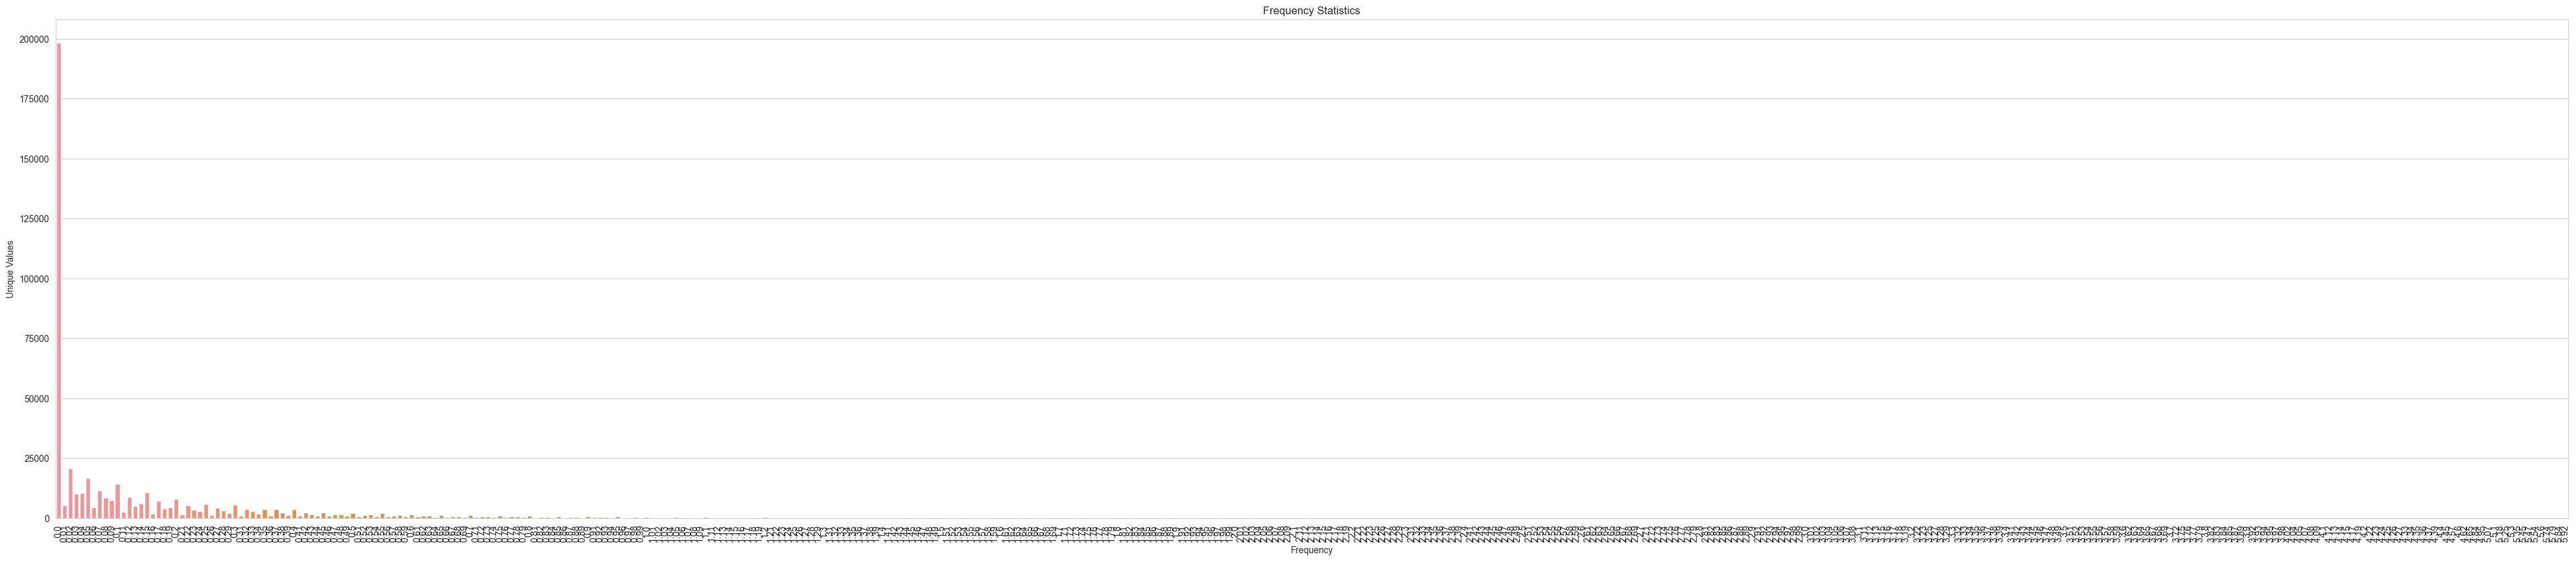

In [94]:
# df_processed.DelayTime.value_counts().plot(kind='barh')
fig = plt.figure(figsize=(50, 10))

ax = sns.countplot(data=df_processed, x='DelayTime')
ax.set_xlabel('Frequency')
ax.set_ylabel('Unique Values')
ax.set_title('Frequency Statistics')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Pairplot

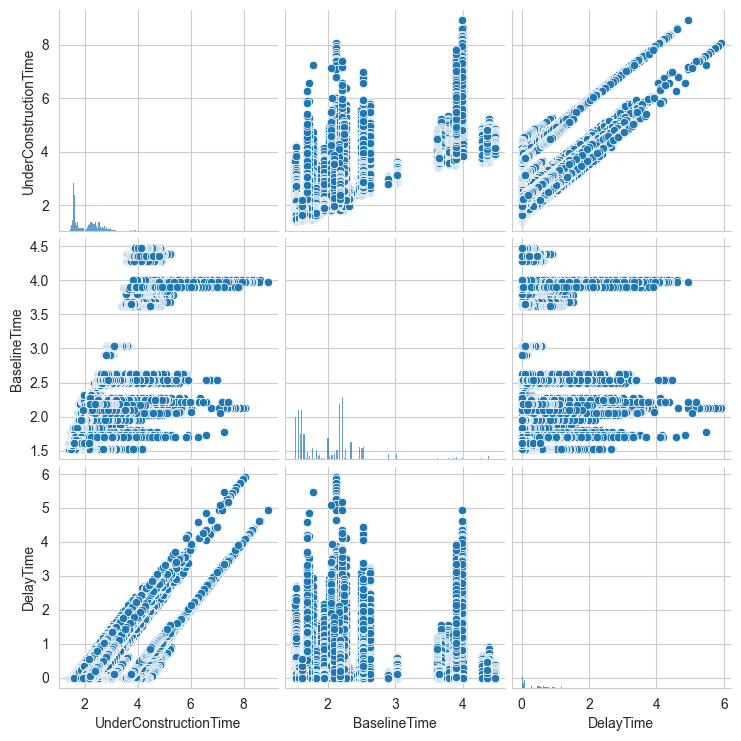

In [95]:
sns.pairplot(df_processed[['UnderConstructionTime', 'BaselineTime', 'DelayTime']])
plt.show()

### Histogram

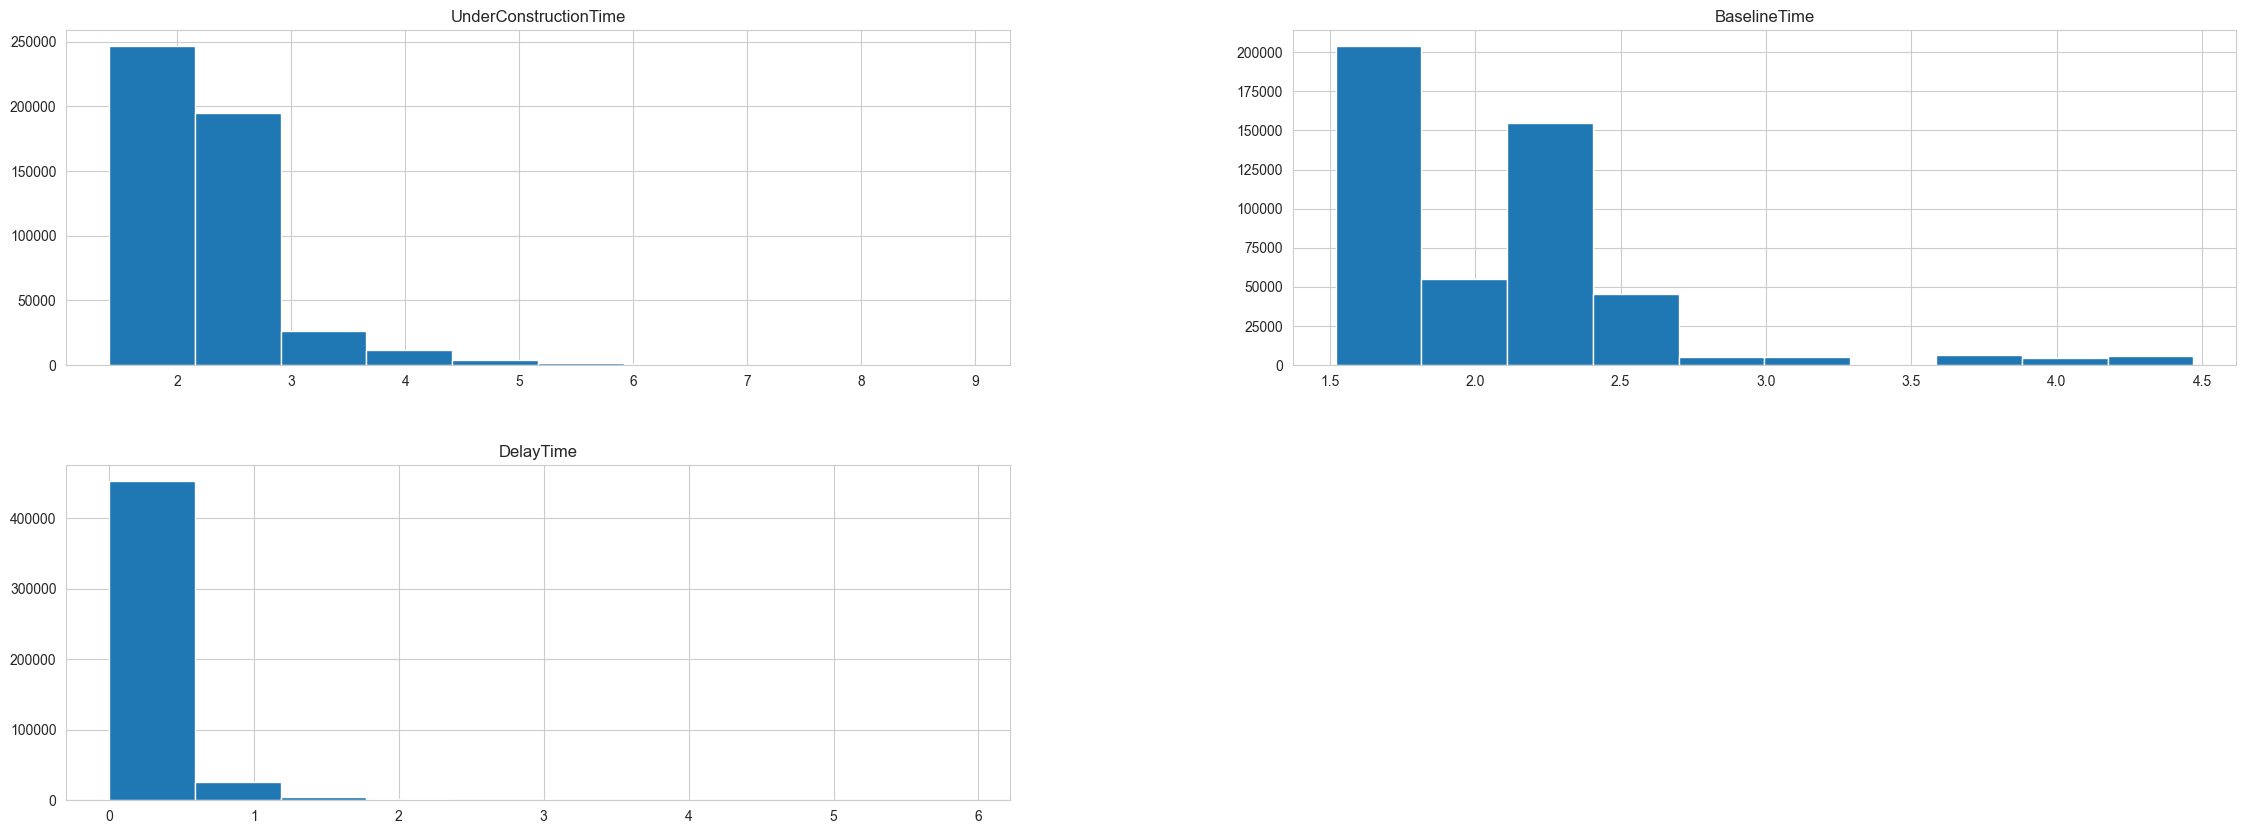

In [96]:
df_processed[['UnderConstructionTime', 'BaselineTime', 'DelayTime']].hist(figsize=(28, 10))
# count, division = np.histogram(df_processed['UnderConstructionTime'])
# print(count)
# print(division)
plt.show()

# Model

## Divide into training and test set

In [97]:
df_train, df_test = train_test_split(df_processed, test_size=0.1)
df_processed.columns
df_processed.nunique()

AssetNumber                 81
UnderConstructionTime      408
BaselineTime                57
DelayTime                  427
SegmentLength               47
                          ... 
WZ_OrigLaneCount_norm        2
WZ_NewLaneCount_norm         1
WZ_ClosedLaneCount_norm      2
WZ_BarrelSpace_norm          5
WZ_CalculatedAADT_norm       7
Length: 95, dtype: int64

### Selected Columns

In [98]:
drop_cols = set(df_processed.columns[df_processed.nunique() <= 1])

interest_cols = {
    # 'AssetNumber', 'WZ_Hwy_norm',
    'CreatedDate:Season_Code_sin', 'CreatedDate:Season_Code_cos',
    'CreatedDate:Month_sin', 'CreatedDate:Month_cos',
    'CreatedDate:Day_sin', 'CreatedDate:Day_cos',
    'CreatedDate:DayOfYear_sin', 'CreatedDate:DayOfYear_cos',
    'CreatedDate:Weekday_sin', 'CreatedDate:Weekday_cos',
    'CreatedDate:Hour_sin', 'CreatedDate:Hour_cos',
    'CreatedDate:MinuteInDay_sin', 'CreatedDate:MinuteInDay_cos',

    'TravelDirect_Code',
    'Spread:Spread3B_onehot', 'Spread:Spread3C_onehot', 'Spread:Spread4A_onehot', 'Spread:Spread4B_onehot', 'Spread:Reactivation_onehot', 'Spread:Spread5B_onehot',
    'TrafficImpact:Low_onehot', 'TrafficImpact:Moderate_onehot', 'TrafficImpact:High_onehot',
    'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'RoadType:Multi-LaneDivided_onehot',
    'TrafficControlSetup:SLAT_onehot', 'TrafficControlSetup:LaneClosure_onehot',

    'WZ_IsBidirectional', 'WZ_IsTransSpd', 'WZ_IsPrepStop', 'WZ_IsOrigIDivided', 'WZ_IsMinAprch',

    'CreatedDate:Year_norm',
    'SegmentLength_norm',
    'Weather:Temp_norm', 'Weather:Precip_norm', 'Weather:WindSpd_norm',
    # 'Traffic:CalculatedAADT_norm',
    'PostedSpd_norm',
    'WZ_TransLenStart_norm', 'WZ_2ndTransLenStart_norm', 'WZ_TransLenEnd_norm',
    'WZ_Length_Lower_norm',
    'WZ_ConstSignSpdLimDist_norm', 'WZ_ThxSignSpdLimDist_norm',
    'WZ_SpdLim_norm',
    'WZ_OrigLaneCount_norm', 'WZ_NewLaneCount_norm', 'WZ_ClosedLaneCount_norm',
    'WZ_BarrelSpace_norm',
    'WZ_CalculatedAADT_norm'}

x_cols = list(interest_cols - drop_cols)

# y_cols = ['UnderConstructionTime_norm', 'DelayTime_norm']
y_cols = ['UnderConstructionTime']

print("x_cols:\n", x_cols)
print("y_cols:\n", y_cols)

x_cols:
 ['WZ_Length_Lower_norm', 'CreatedDate:Season_Code_cos', 'WZ_TransLenStart_norm', 'CreatedDate:Hour_cos', 'CreatedDate:Day_sin', 'Spread:Spread4B_onehot', 'CreatedDate:Weekday_cos', 'Weather:Temp_norm', 'CreatedDate:Day_cos', 'CreatedDate:Season_Code_sin', 'WZ_BarrelSpace_norm', 'Spread:Spread4A_onehot', 'TravelDirect_Code', 'TrafficImpact:Moderate_onehot', 'WZ_IsTransSpd', 'Weather:Precip_norm', 'SegmentLength_norm', 'CreatedDate:DayOfYear_cos', 'WZ_CalculatedAADT_norm', 'WZ_TransLenEnd_norm', 'Spread:Reactivation_onehot', 'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'WZ_SpdLim_norm', 'Spread:Spread5B_onehot', 'TrafficControlSetup:LaneClosure_onehot', 'WZ_ConstSignSpdLimDist_norm', 'TrafficImpact:High_onehot', 'CreatedDate:Month_cos', 'CreatedDate:Hour_sin', 'Weather:WindSpd_norm', 'WZ_ThxSignSpdLimDist_norm', 'CreatedDate:Month_sin', 'CreatedDate:MinuteInDay_sin', 'Spread:Spread3C_onehot', 'WZ_2ndTransLenStart_norm', 'TrafficImpact:Low_onehot', 'WZ_IsOrigIDivided', 'W

In [99]:
df_processed.columns

Index(['AssetNumber', 'UnderConstructionTime', 'BaselineTime', 'DelayTime',
       'SegmentLength', 'TravelDirect', 'Spread', 'TrafficImpact', 'RoadType',
       'TrafficControlSetup', 'CreatedDate:Weekday', 'CreatedDate:DayOfYear',
       'CreatedDate:Year', 'CreatedDate:Month', 'CreatedDate:Day',
       'CreatedDate:Hour', 'CreatedDate:MinuteInDay', 'CreatedDate:Season',
       'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd', 'WZ_Hwy',
       'PostedSpd', 'WZ_IsBidirectional', 'WZ_ConstSignSpdLimDist',
       'WZ_TransLenStart', 'WZ_2ndTransLenStart', 'WZ_Length',
       'WZ_TransLenEnd', 'WZ_SpdLim', 'WZ_TransSpd', 'WZ_IsPrepStop',
       'WZ_ThxSignSpdLimDist', 'WZ_OrigLaneCount', 'WZ_IsOrigIDivided',
       'WZ_NewLaneCount', 'WZ_ClosedLaneCount', 'WZ_IsMinAprch',
       'WZ_BarrelSpace', 'WZ_CalculatedAADT', 'CreatedDate:Season_Code',
       'TravelDirect_Code', 'CreatedDate:Season_Code_norm',
       'CreatedDate:Season_Code_sin', 'CreatedDate:Season_Code_cos',
       'Create

In [100]:
drop_cols = set(df_processed.columns[df_processed.nunique() <= 1])

interest_cols = {
    # 'AssetNumber', 'WZ_Hwy_norm',
    'CreatedDate:Season_Code',
    'CreatedDate:Month',
    'CreatedDate:Day',
    'CreatedDate:DayOfYear',
    'CreatedDate:Weekday',
    'CreatedDate:Hour',
    'CreatedDate:MinuteInDay',

    'TravelDirect_Code',
    'Spread:Spread3B_onehot', 'Spread:Spread3C_onehot', 'Spread:Spread4A_onehot', 'Spread:Spread4B_onehot', 'Spread:Reactivation_onehot', 'Spread:Spread5B_onehot',
    'TrafficImpact:Low_onehot', 'TrafficImpact:Moderate_onehot', 'TrafficImpact:High_onehot',
    'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'RoadType:Multi-LaneUndivided_onehot',
    'TrafficControlSetup:SLAT_onehot', 'TrafficControlSetup:LaneClosure_onehot',

    'WZ_IsBidirectional', 'WZ_IsPrepStop', 'WZ_IsOrigIDivided', 'WZ_IsMinAprch',

    'CreatedDate:Year',
    'SegmentLength',
    'Weather:Temp', 'Weather:Precip', 'Weather:WindSpd',
    # 'Traffic:CalculatedAADT_norm',
    'PostedSpd',
    'WZ_TransLenStart', 'WZ_2ndTransLenStart', 'WZ_TransLenEnd',
    'WZ_Length',
    'WZ_ConstSignSpdLimDist', 'WZ_ThxSignSpdLimDist',
    'WZ_SpdLim', 'WZ_TransSpd',
    'WZ_OrigLaneCount', 'WZ_NewLaneCount', 'WZ_ClosedLaneCount',
    'WZ_BarrelSpace',
    'WZ_CalculatedAADT'}

x_cols = list(interest_cols - drop_cols)

# y_cols = ['UnderConstructionTime_norm', 'DelayTime_norm']
y_cols = ['UnderConstructionTime']

print("x_cols:\n", x_cols)
print("y_cols:\n", y_cols)

x_cols:
 ['CreatedDate:Weekday', 'CreatedDate:MinuteInDay', 'Spread:Spread4B_onehot', 'CreatedDate:Day', 'WZ_OrigLaneCount', 'WZ_TransSpd', 'Weather:Precip', 'Spread:Spread4A_onehot', 'WZ_TransLenStart', 'TravelDirect_Code', 'TrafficImpact:Moderate_onehot', 'SegmentLength', 'CreatedDate:Month', 'WZ_CalculatedAADT', 'Spread:Reactivation_onehot', 'WZ_ThxSignSpdLimDist', 'CreatedDate:Hour', 'WZ_ClosedLaneCount', 'RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot', 'WZ_Length', 'CreatedDate:DayOfYear', 'Spread:Spread5B_onehot', 'TrafficControlSetup:LaneClosure_onehot', 'TrafficImpact:High_onehot', 'WZ_2ndTransLenStart', 'WZ_BarrelSpace', 'Spread:Spread3C_onehot', 'WZ_TransLenEnd', 'CreatedDate:Season_Code', 'TrafficImpact:Low_onehot', 'RoadType:Multi-LaneUndivided_onehot', 'Weather:Temp', 'WZ_IsOrigIDivided', 'WZ_ConstSignSpdLimDist', 'WZ_IsMinAprch', 'Spread:Spread3B_onehot', 'WZ_IsBidirectional', 'WZ_SpdLim', 'Weather:WindSpd']
y_cols:
 ['UnderConstructionTime']


In [101]:
x_train = df_train.filter(x_cols)
x_test = df_test.filter(x_cols)
print("train.shape:", x_train.shape)
print("test.shape:", x_test.shape)

y_train = df_train.filter(y_cols)
y_test = df_test.filter(y_cols)

# x_train = np.array(x_train.astype(np.float32))
# y_train = np.array(y_train.astype(np.float32))
# x_test = np.array(x_test.astype(np.float32))
# y_test = np.array(y_test.astype(np.float32))
# x_train = np.array(x_train)
# y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test = np.array(y_test)

train_dataset = TensorDataset(torch.tensor(np.array(x_train.astype(np.float32)), dtype=torch.float32), torch.tensor(np.array(y_train.astype(np.float32)), dtype=torch.float32))
val_dataset = TensorDataset(torch.tensor(np.array(x_test.astype(np.float32)), dtype=torch.float32), torch.tensor(np.array(y_test.astype(np.float32)), dtype=torch.float32))

train.shape: (437204, 34)
test.shape: (48579, 34)


### Training Set

In [102]:
# df_train = df_processed[~df_processed['AssetNumber'].isin(assets_no_cell)]
# df_train
# df_train.columns

# print(len(x_train.columns))
# print(x_train.columns)
# x_train
# y_train

### Test Set

In [103]:
# df_test = df_processed[df_processed['AssetNumber'].isin(assets_no_cell)]
# df_test
# x_test
# y_test


In [104]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = nn.Sequential(
            nn.Linear(x_train.shape[1], 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, len(y_cols))
        ).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

print(model)

Sequential(
  (0): Linear(in_features=34, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=512, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=512, out_features=256, bias=True)
  (6): ReLU()
  (7): Linear(in_features=256, out_features=128, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=128, out_features=1, bias=True)
)


## Fit

In [105]:
def calculate_evaluation_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    mape = mean_absolute_percentage_error(true, pred)
    r2 = r2_score(true, pred)

    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, R2 Score: {r2}\n")

    return [mse, rmse, mae, mape, r2]

In [106]:
n_epochs = 500
batch_size = 1024


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)


for epoch in range(n_epochs):
    model.train()
    total_loss = 0.0
    for batch_inputs, batch_labels in train_loader:
        batch_inputs = batch_inputs.to(device)
        batch_labels = batch_labels.to(device)
        batch_outputs = model(batch_inputs)

        optimizer.zero_grad()
        loss = criterion(batch_outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    total_loss /= len(train_loader)

    if epoch % 10 == 0:
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            predictions = []
            true_labels = []

            for batch_inputs, batch_labels in val_loader:
                batch_inputs = batch_inputs.to(device)
                batch_labels = batch_labels.to(device)

                batch_outputs = model(batch_inputs)
                val_loss += criterion(batch_outputs, batch_labels).item()

                predictions.extend(batch_outputs.cpu().numpy())
                true_labels.extend(batch_labels.cpu().numpy())

            val_loss /= len(val_loader)

        print(f"Epoch: {epoch}, Training Loss: {total_loss}, Validation Loss: {val_loss}")

        true_labels = np.array(true_labels)
        predictions = np.array(predictions)
        calculate_evaluation_metrics(true_labels, predictions)


Epoch: 0, Training Loss: 11.459551192558342, Validation Loss: 0.44134751334786415
MSE: 0.4412492513656616, RMSE: 0.6642659306526184, MAE: 0.45807814598083496, MAPE: 0.19024363160133362, R2 Score: -0.0019125588477357791

Epoch: 10, Training Loss: 0.32568374827539054, Validation Loss: 0.2181430890535315
MSE: 0.21802400052547455, RMSE: 0.4669303894042969, MAE: 0.2764160633087158, MAPE: 0.1044309213757515, R2 Score: 0.5049487858377508

Epoch: 20, Training Loss: 0.18490543923137898, Validation Loss: 0.11793749841550986
MSE: 0.11791877448558807, RMSE: 0.3433930277824402, MAE: 0.26213228702545166, MAPE: 0.12146081030368805, R2 Score: 0.7322504347848262

Epoch: 30, Training Loss: 0.23848449512094747, Validation Loss: 0.10883932979777455
MSE: 0.10883557051420212, RMSE: 0.3299023509025574, MAE: 0.23586344718933105, MAPE: 0.10825011134147644, R2 Score: 0.7528749899676536

Epoch: 40, Training Loss: 0.06463755311256829, Validation Loss: 0.054733747616410255
MSE: 0.054702360183000565, RMSE: 0.233885

## Evaluate Model

In [107]:
model = model.to('cpu')
# torch.tensor(np.array(x_train.astype(np.float32))

### Calculate Metrics

In [108]:
with torch.inference_mode():
    preds_train = model(torch.tensor(np.array(x_train.astype(np.float32)))).flatten()
    calculate_evaluation_metrics(y_train, preds_train)
y_train = y_train.to_numpy().flatten()

MSE: 0.0425010475441067, RMSE: 0.20615782193287427, MAE: 0.12332858041142472, MAPE: 0.05290047535448511, R2 Score: 0.9012007180937377



In [109]:
with torch.inference_mode():
    preds_test = model(torch.tensor(np.array(x_test.astype(np.float32)))).flatten()
    calculate_evaluation_metrics(y_test, preds_test)
y_test = y_test.to_numpy().flatten()

MSE: 0.04233700650902085, RMSE: 0.20575958424583982, MAE: 0.12323581172232301, MAPE: 0.05278561720901604, R2 Score: 0.903868439953733



### Plot Predictions vs Actual

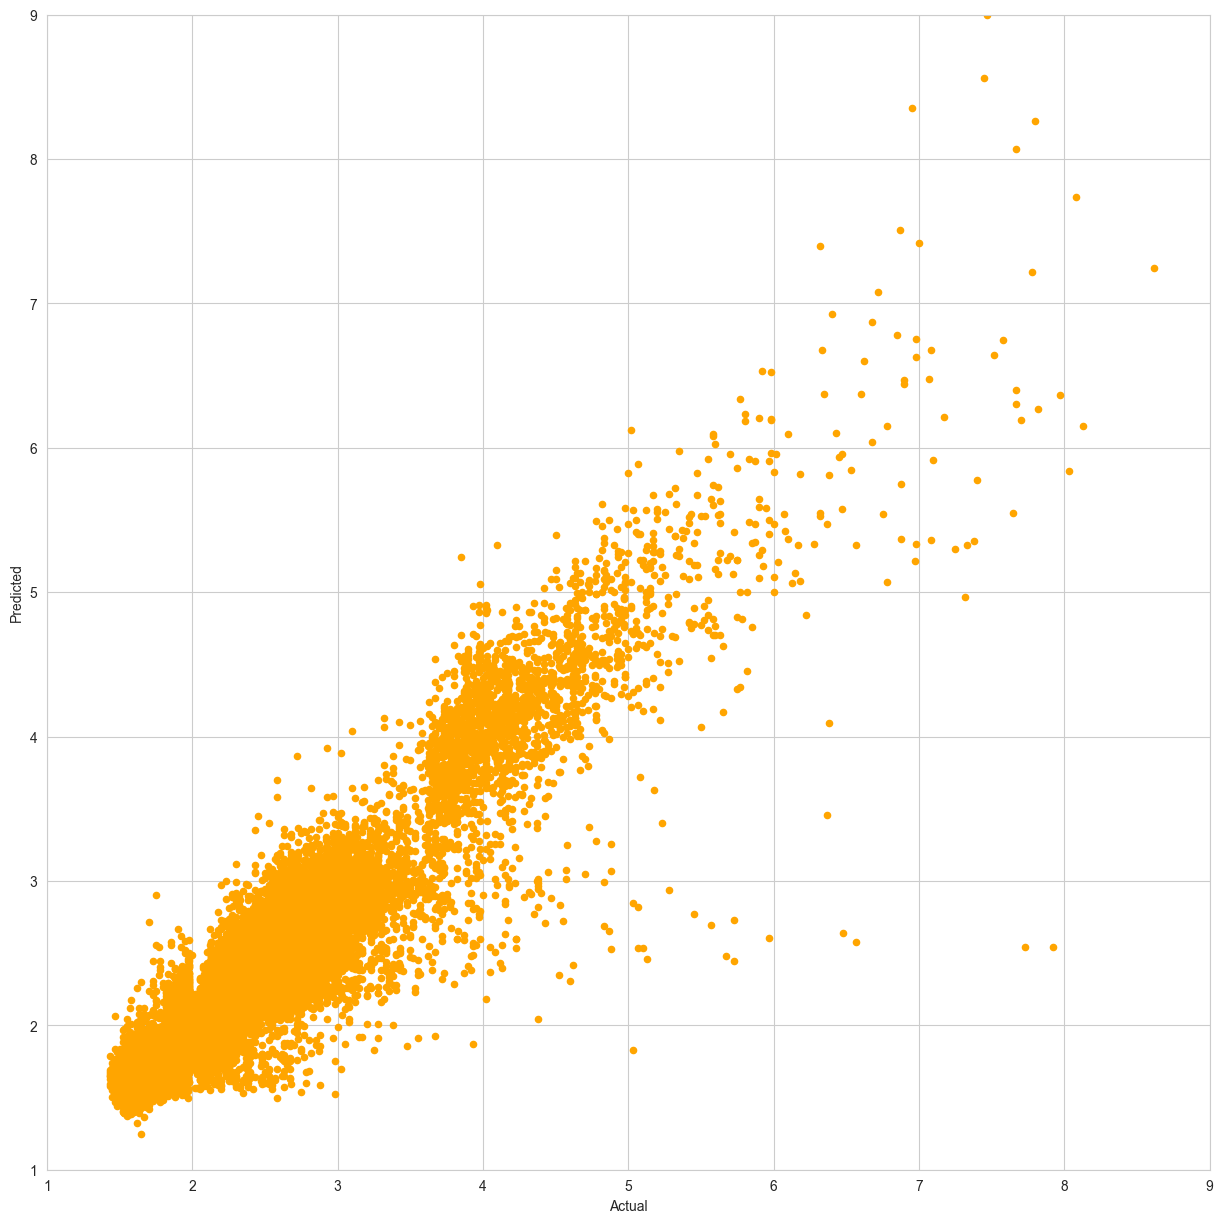

In [135]:
# plt.scatter(predictions, true_labels, color='green')
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': preds_test})
df_results.plot(kind='scatter', x='Actual', y='Predicted', figsize=(15,15), color='orange')
plt.xlim(1,9)
plt.ylim(1,9)
# plt.twinx()
# print(true_labels.flatten())
plt.savefig(os.path.join(output_root_path, 'actual_vs_pred.png'))
plt.show()


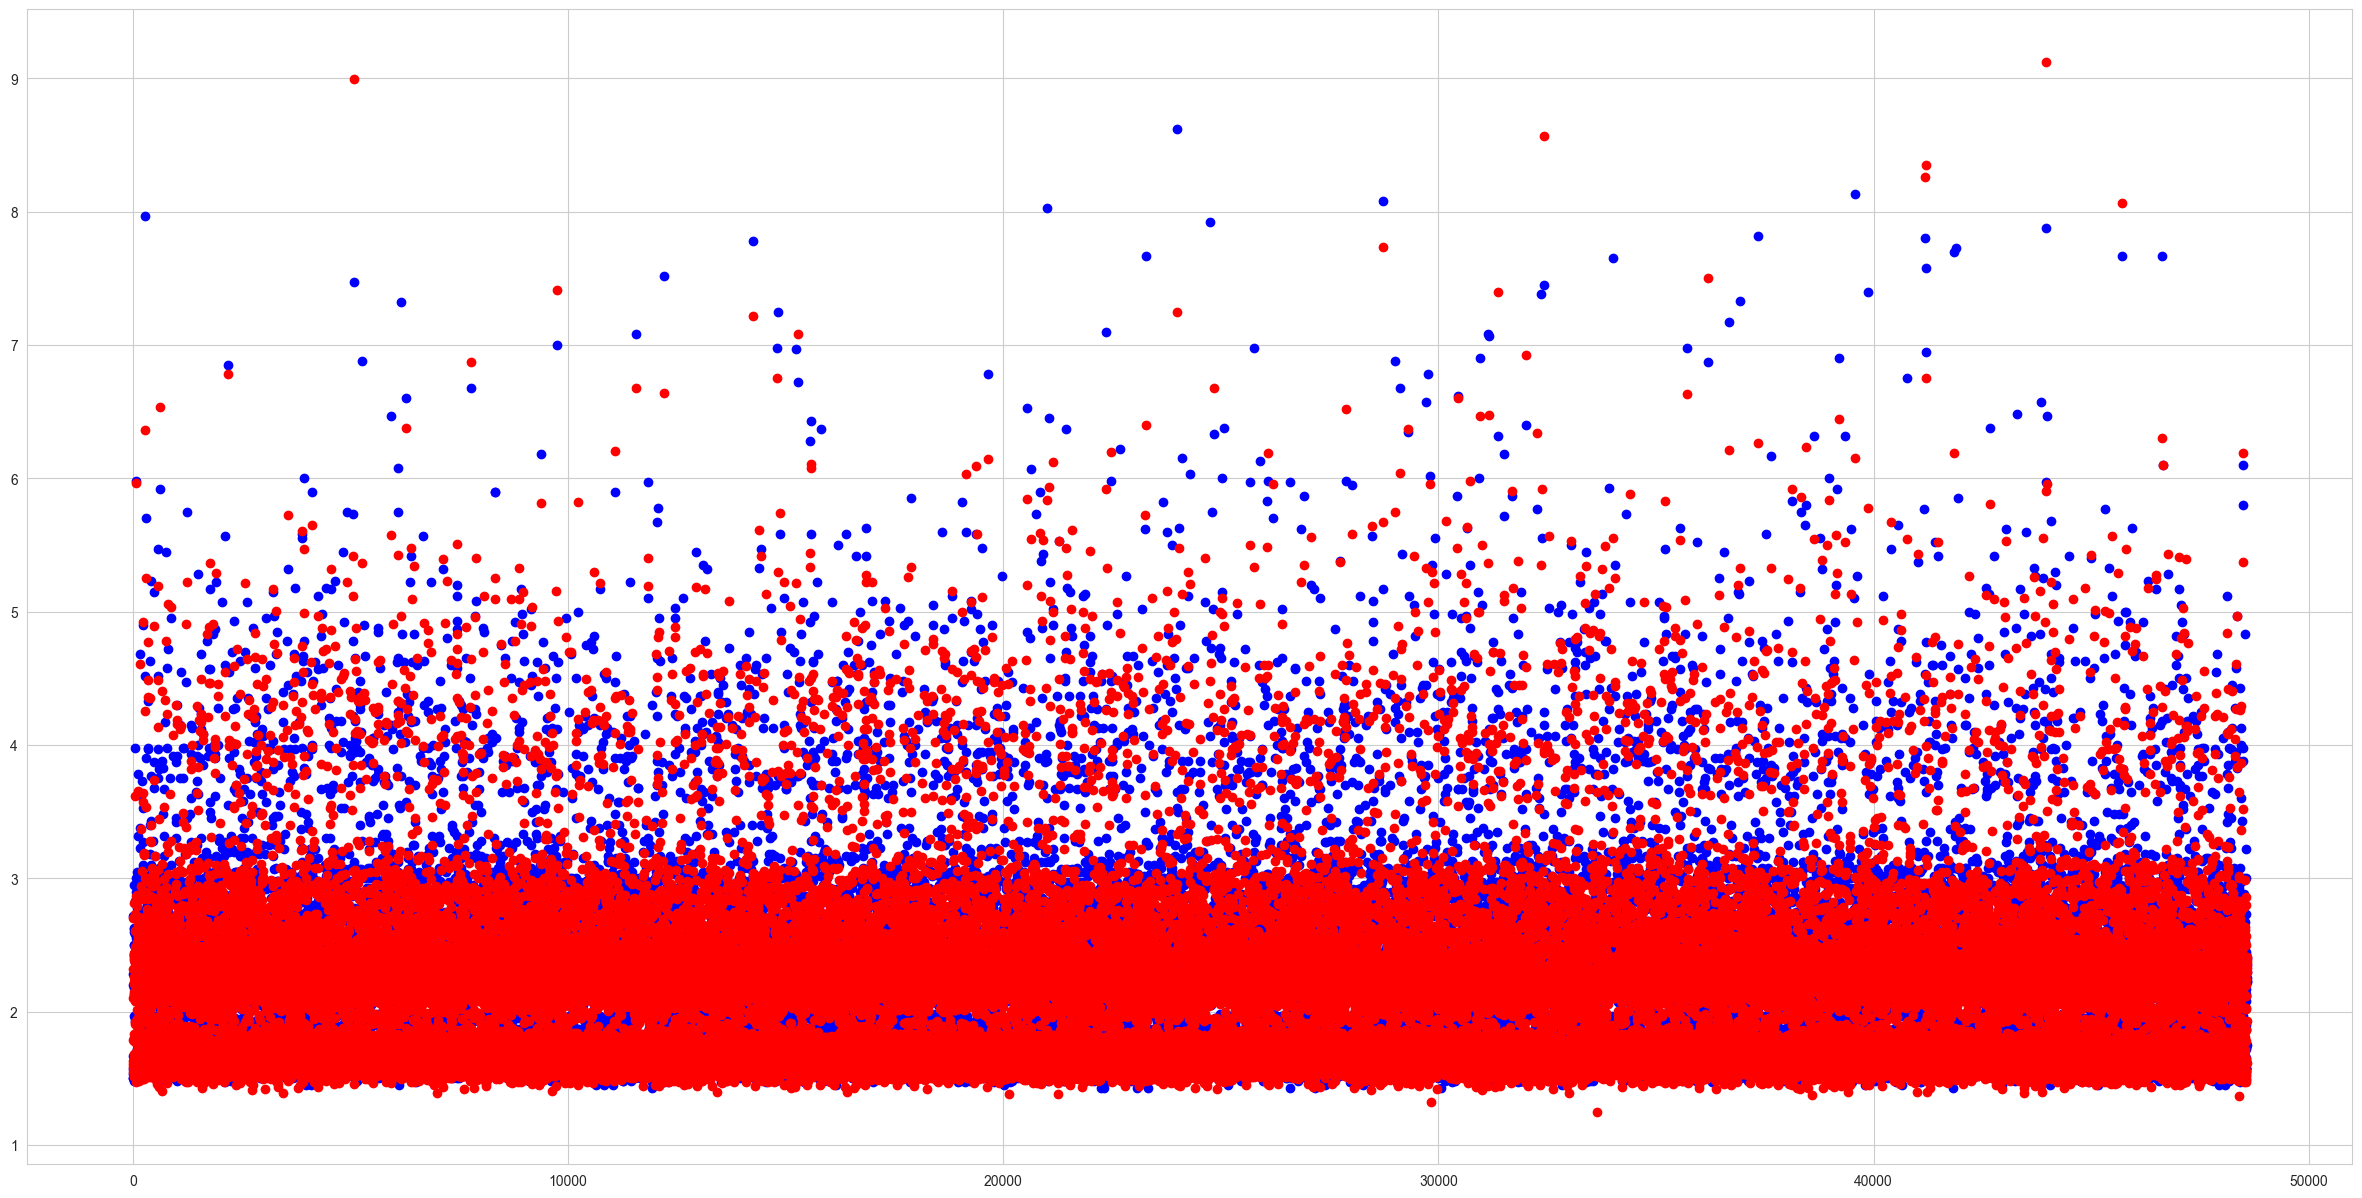

In [136]:
fig = plt.figure(figsize=(30, 15))
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(preds_test)), preds_test, color='red')
fig.savefig(os.path.join(output_root_path, 'actual&pred_vs_time.png'))
plt.show()


### Faeture Impact

CreatedDate:Weekday -> min = 0.0 max = 4.95


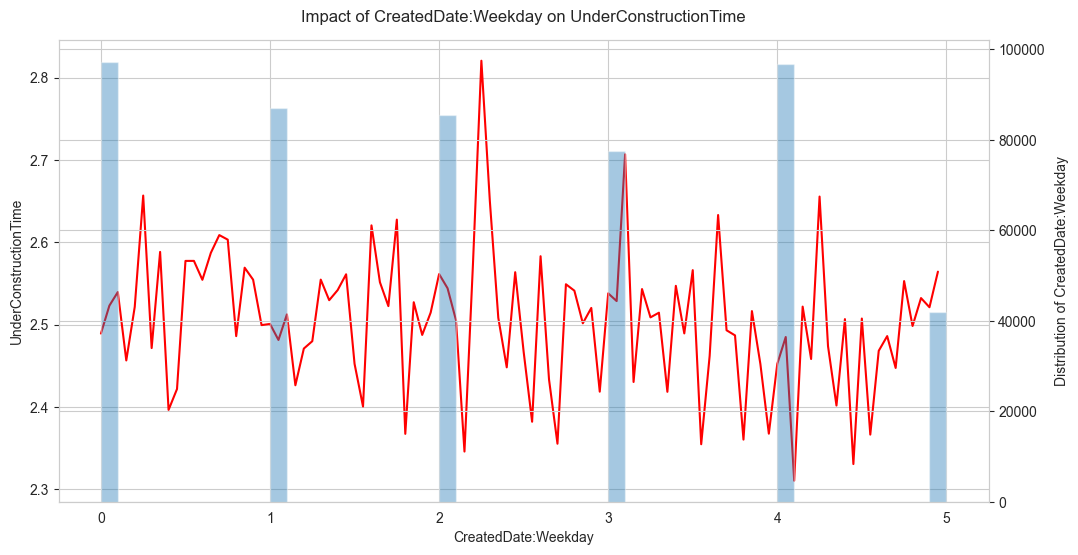

CreatedDate:MinuteInDay -> min = 2.0 max = 1423.6399999999999


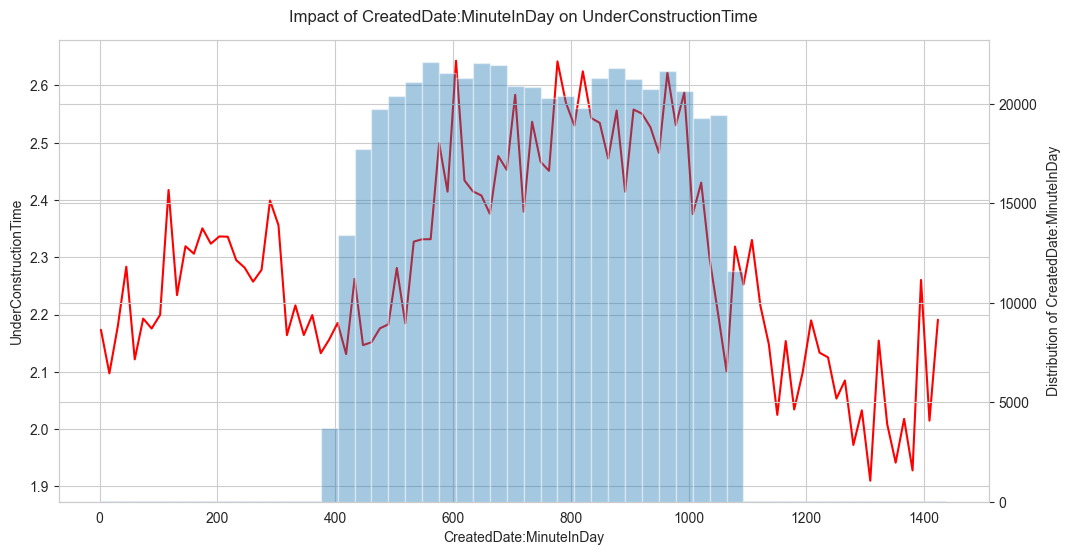

Spread:Spread4B_onehot -> min = 0 max = 1


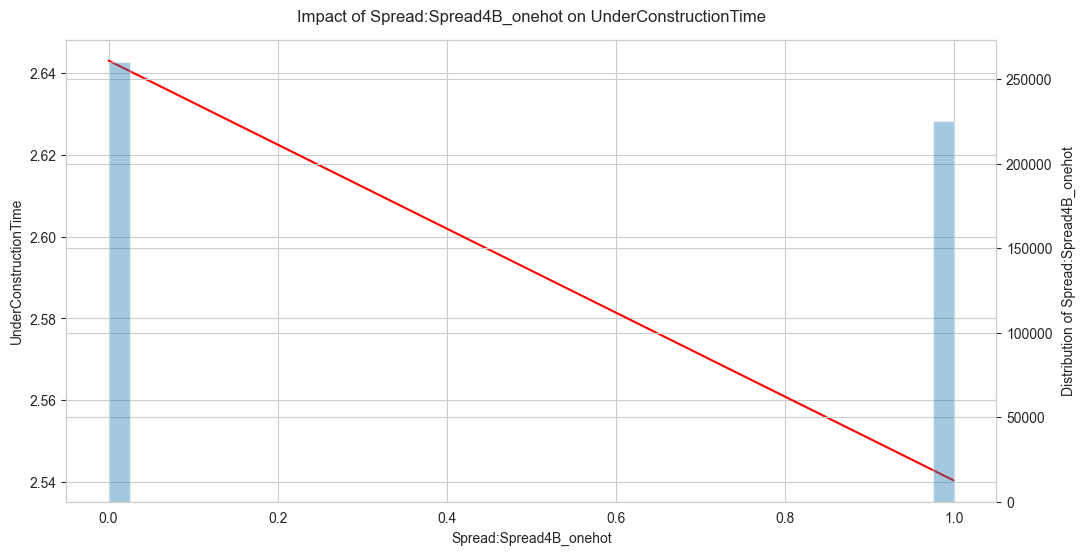

CreatedDate:Day -> min = 1.0 max = 30.700000000000003


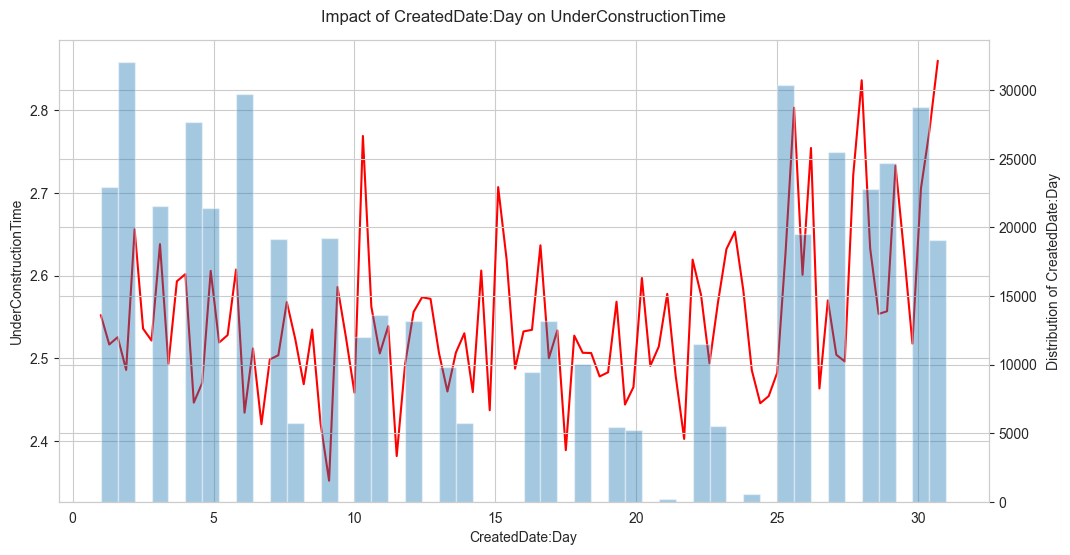

WZ_OrigLaneCount -> min = 1.0 max = 1.9900000000000009


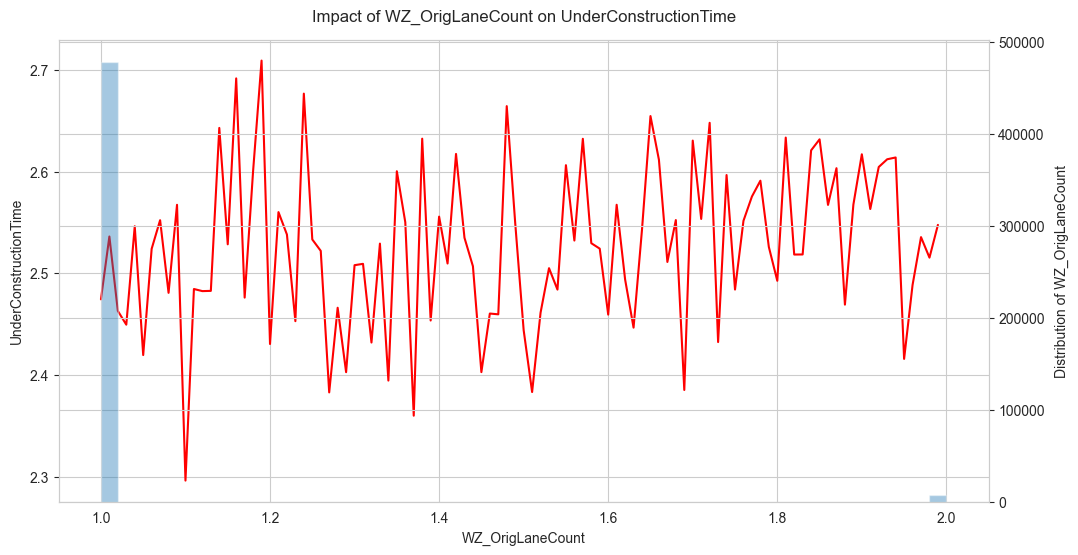

WZ_TransSpd -> min = 0.0 max = 69.3


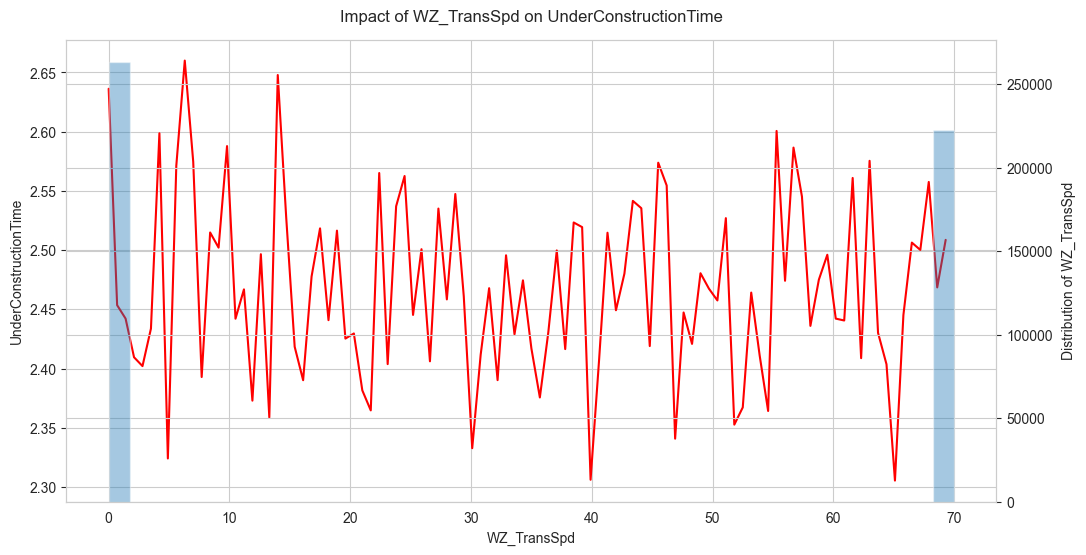

Weather:Precip -> min = 0.0 max = 2.772


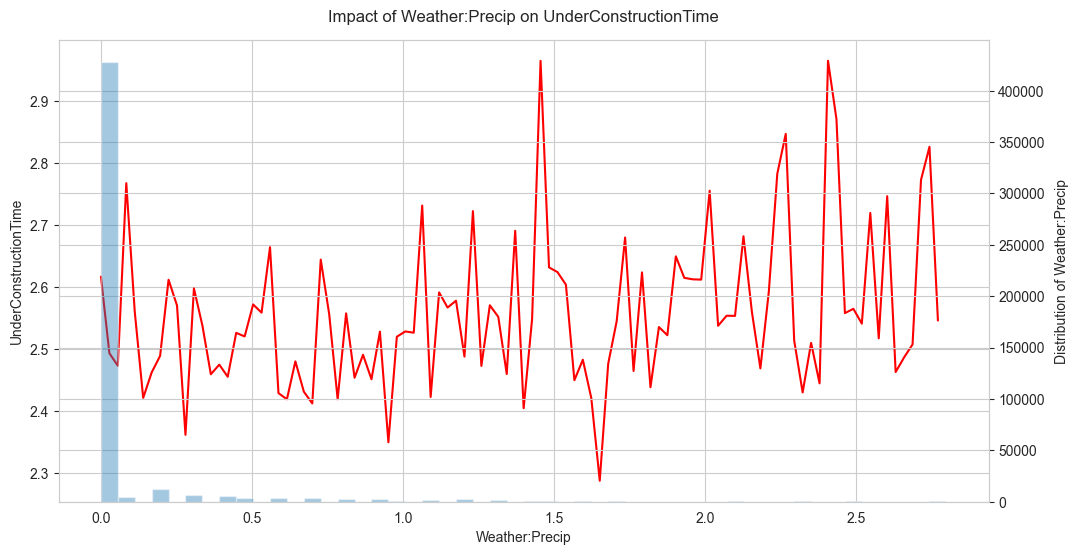

Spread:Spread4A_onehot -> min = 0 max = 1


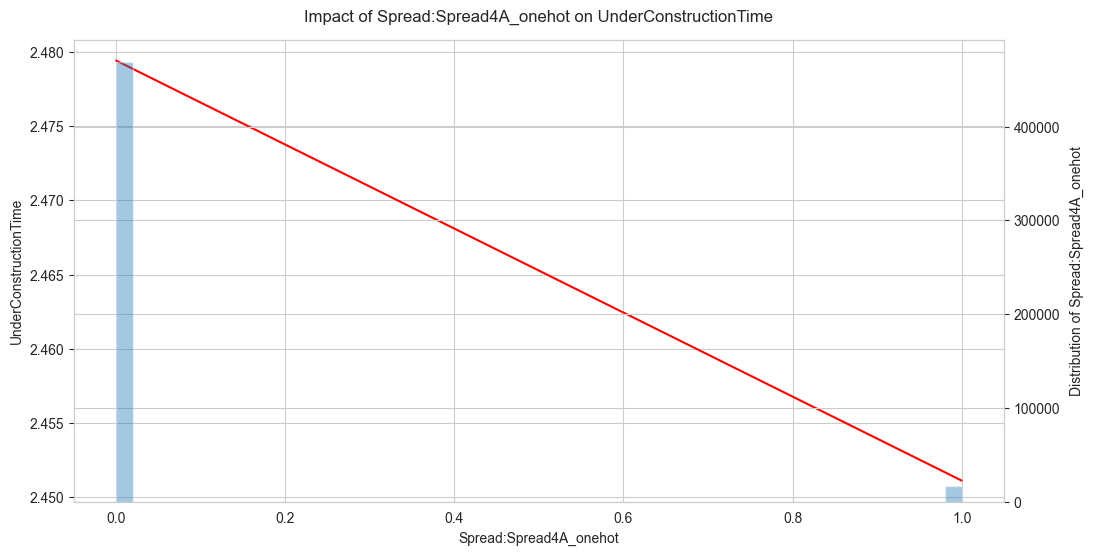

WZ_TransLenStart -> min = 150.0 max = 447.0


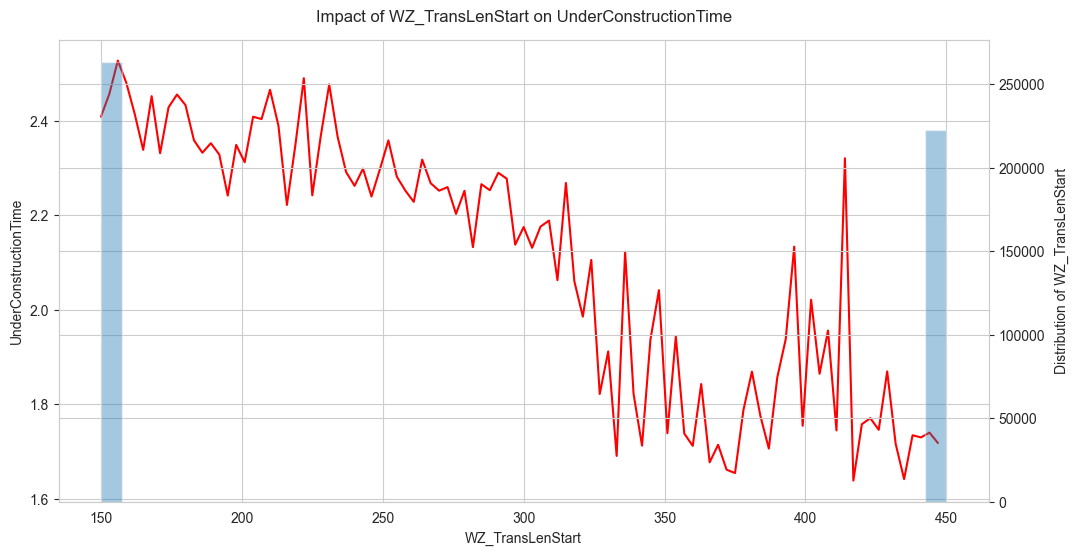

TravelDirect_Code -> min = 0 max = 1


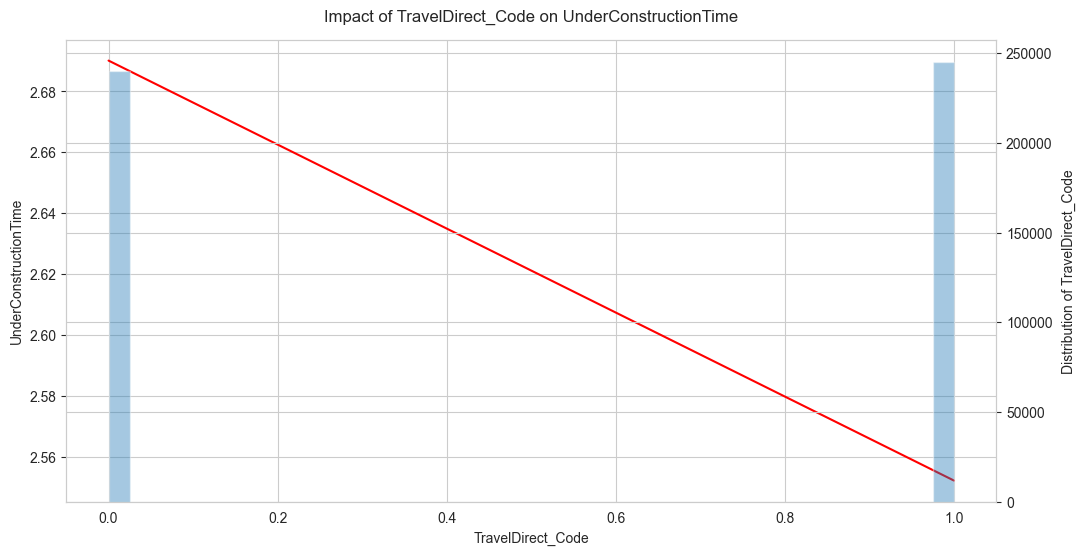

SegmentLength -> min = 2.567 max = 6.213170000000014


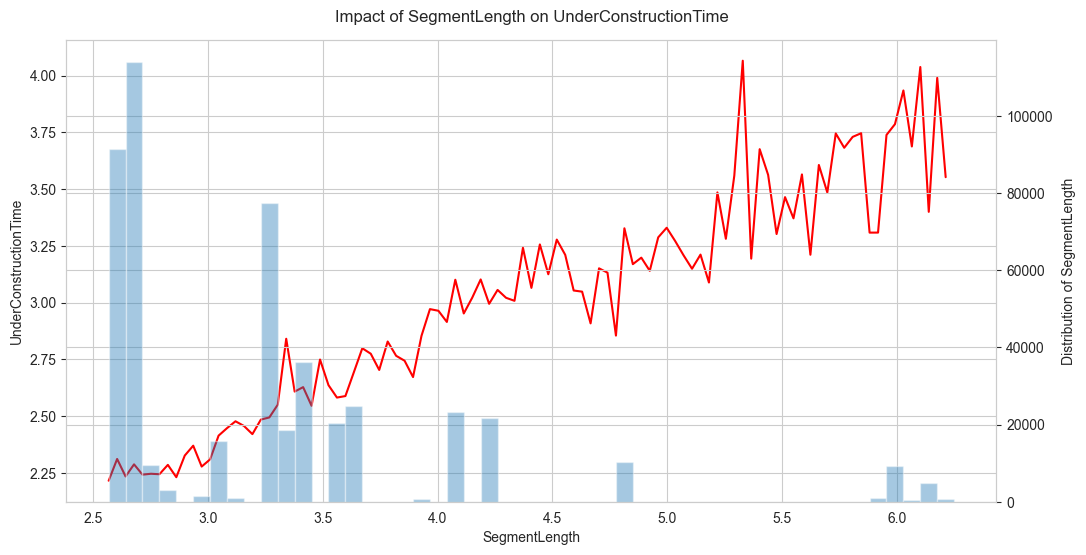

CreatedDate:Month -> min = 3.0 max = 5.969999999999981


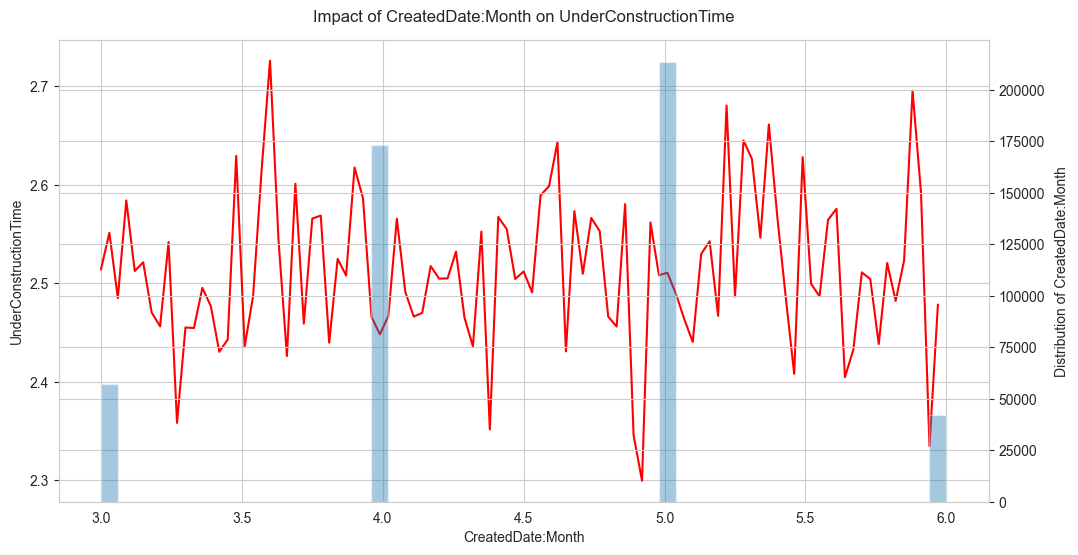

WZ_CalculatedAADT -> min = 2958.16 max = 4956.77200000001


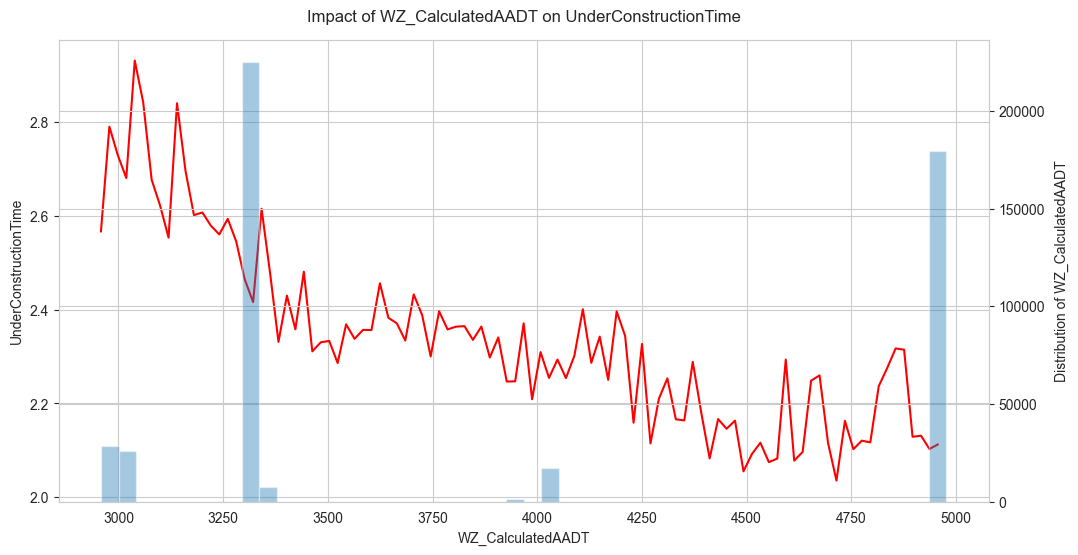

WZ_ThxSignSpdLimDist -> min = 75.0 max = 79.94999999999972


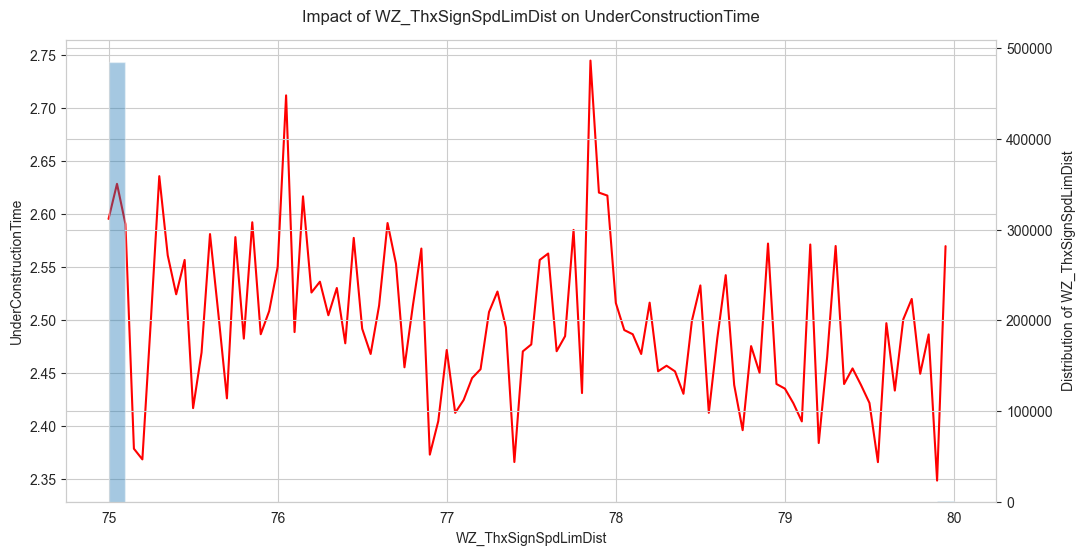

CreatedDate:Hour -> min = 0.0 max = 22.77


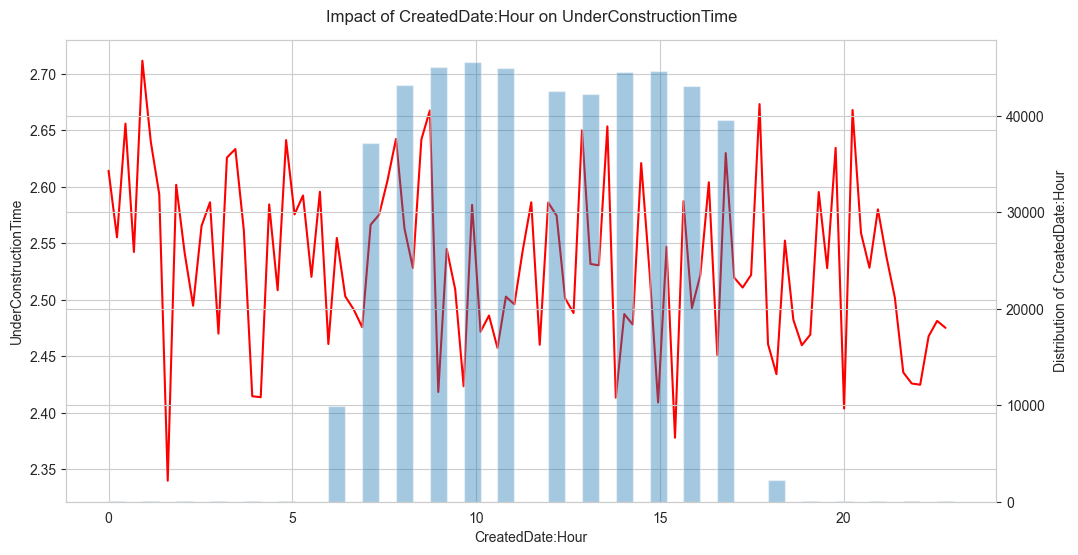

WZ_ClosedLaneCount -> min = 0 max = 1


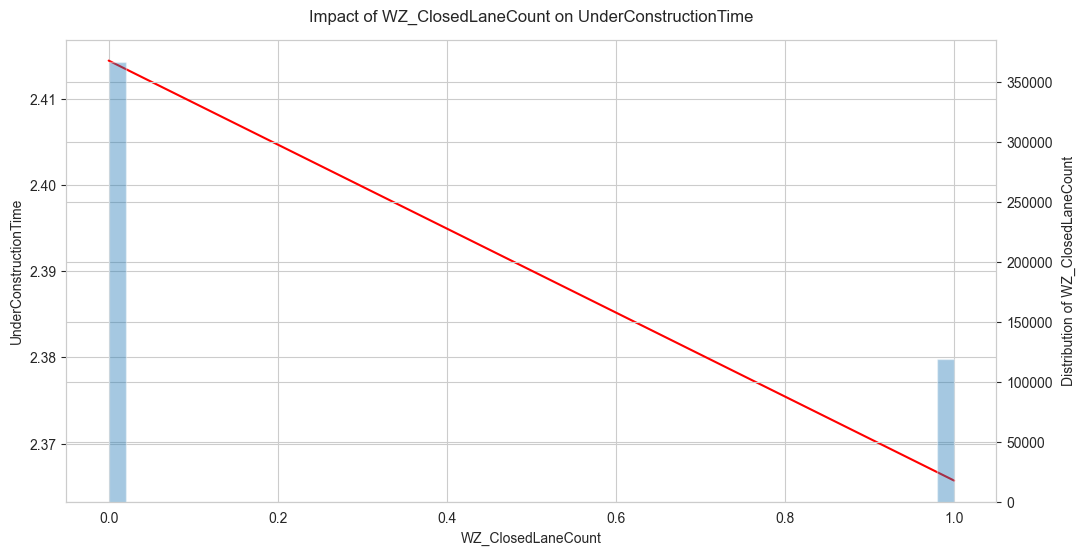

RoadType:Two-Lane,Two-WayRoadways(>70km/h)_onehot -> min = 0 max = 1


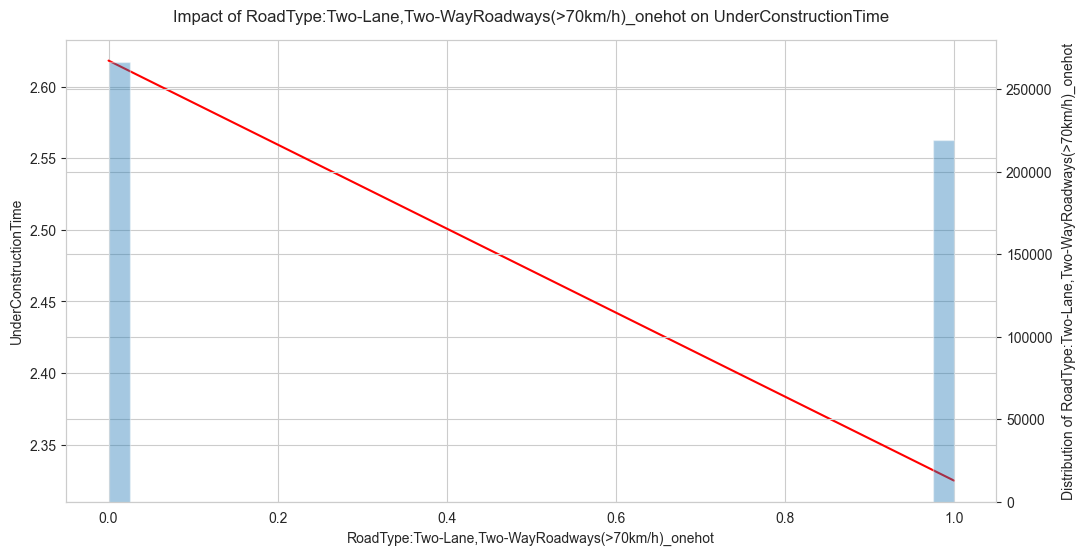

WZ_Length -> min = 50.0 max = 619.25


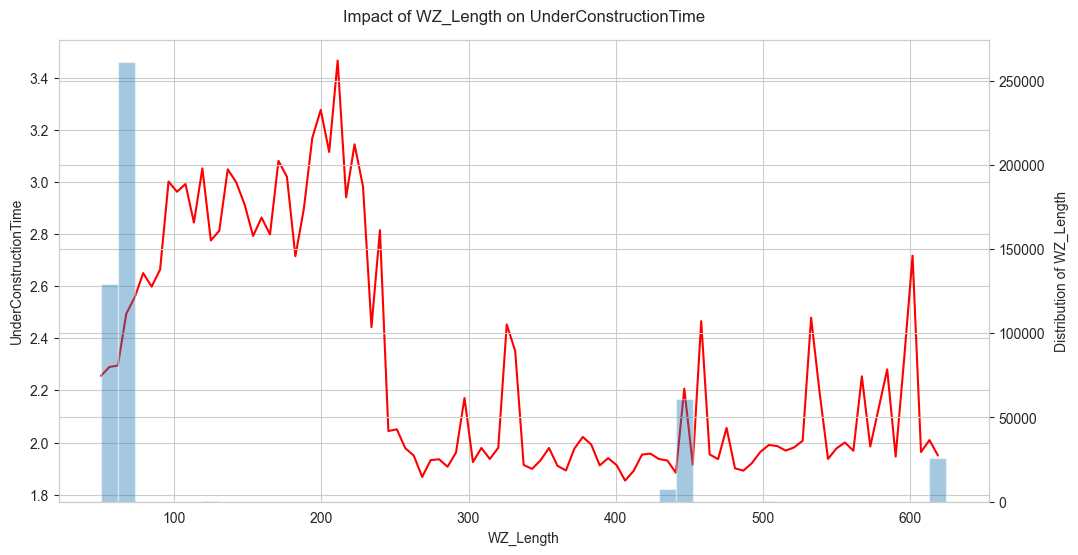

CreatedDate:DayOfYear -> min = 84.0 max = 158.25


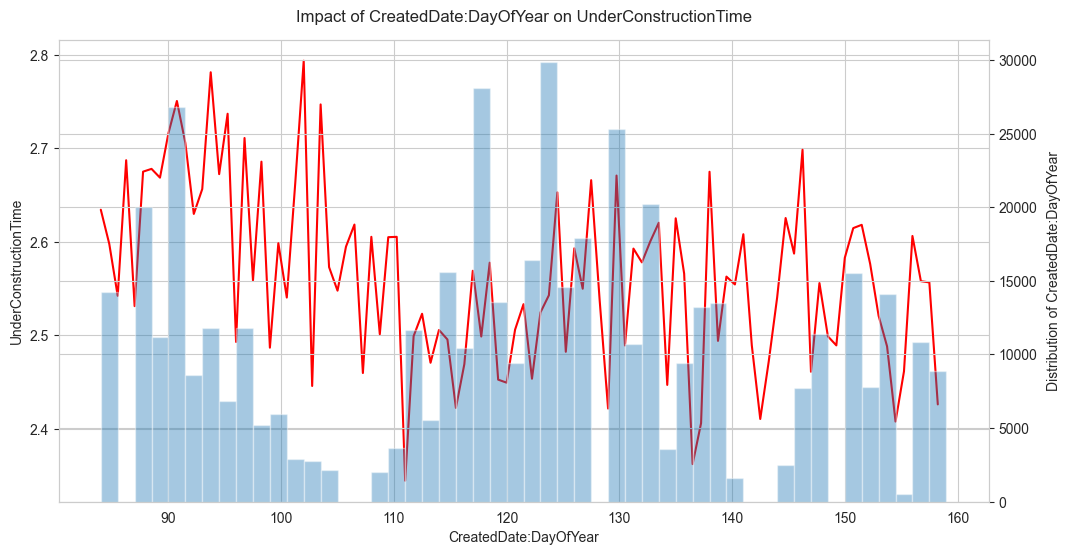

TrafficImpact:High_onehot -> min = 0 max = 1


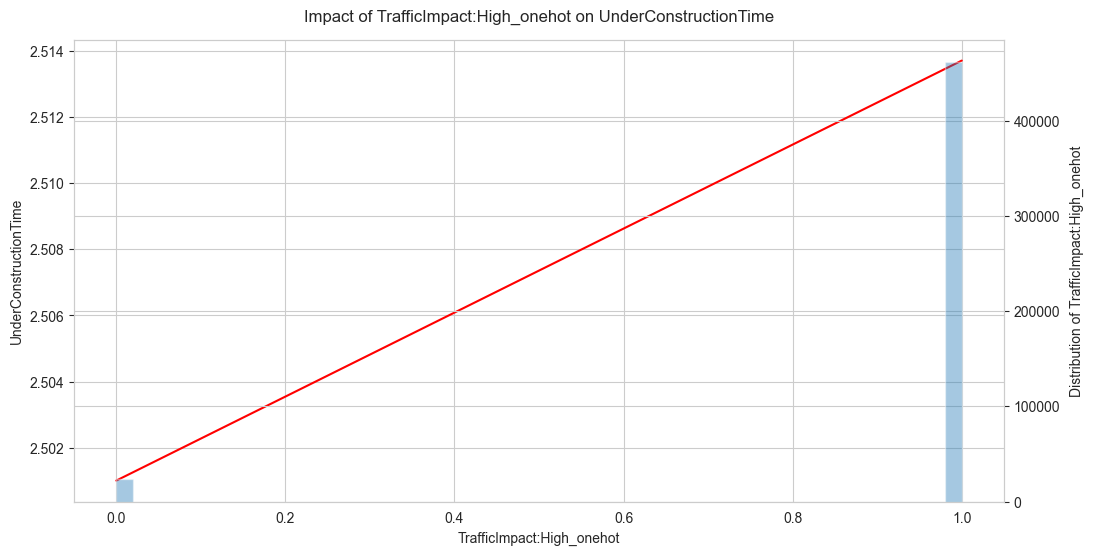

WZ_2ndTransLenStart -> min = 450.0 max = 850.9500000000012


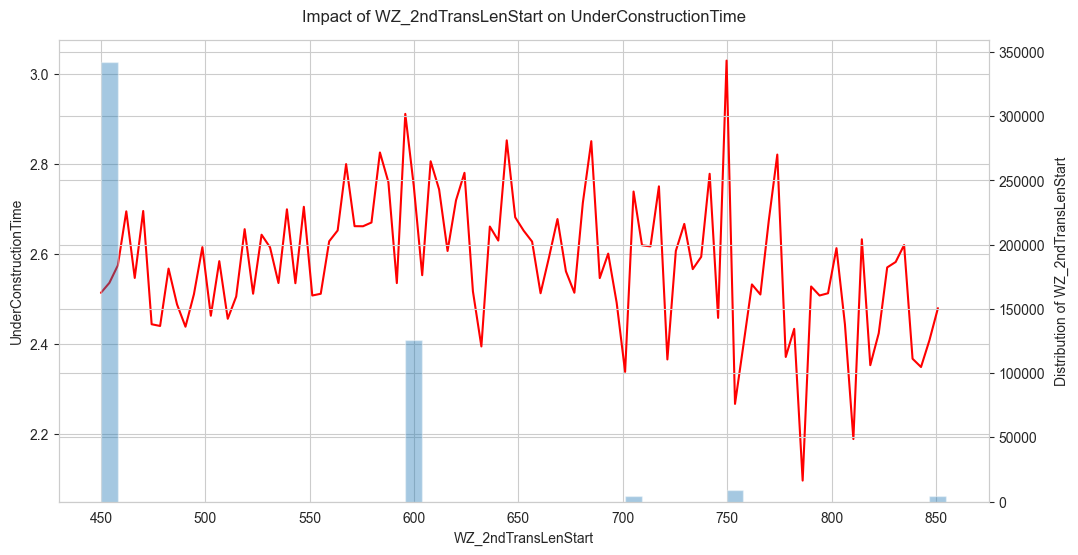

WZ_BarrelSpace -> min = 0.0 max = 1039.5


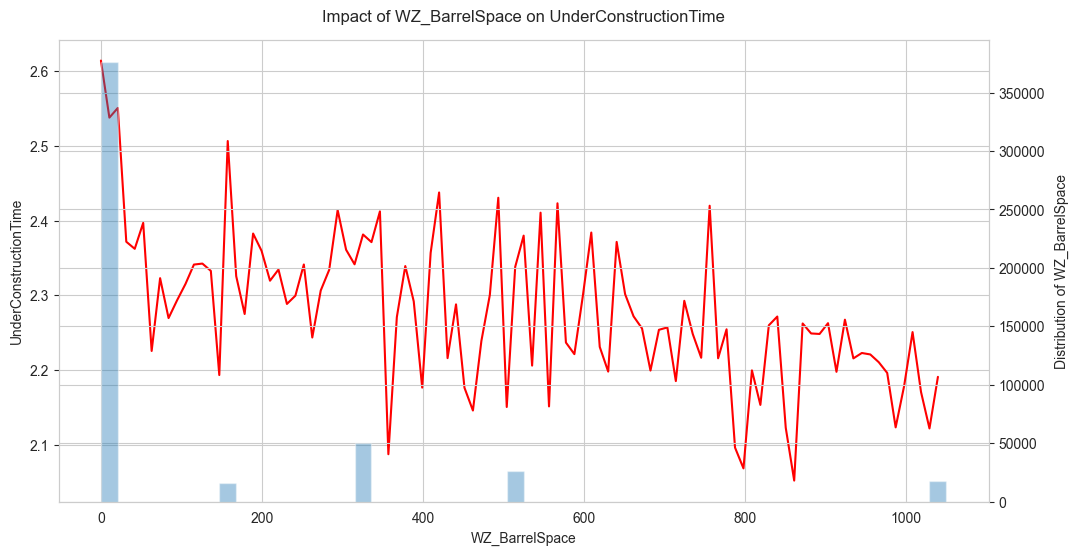

Spread:Spread3C_onehot -> min = 0 max = 1


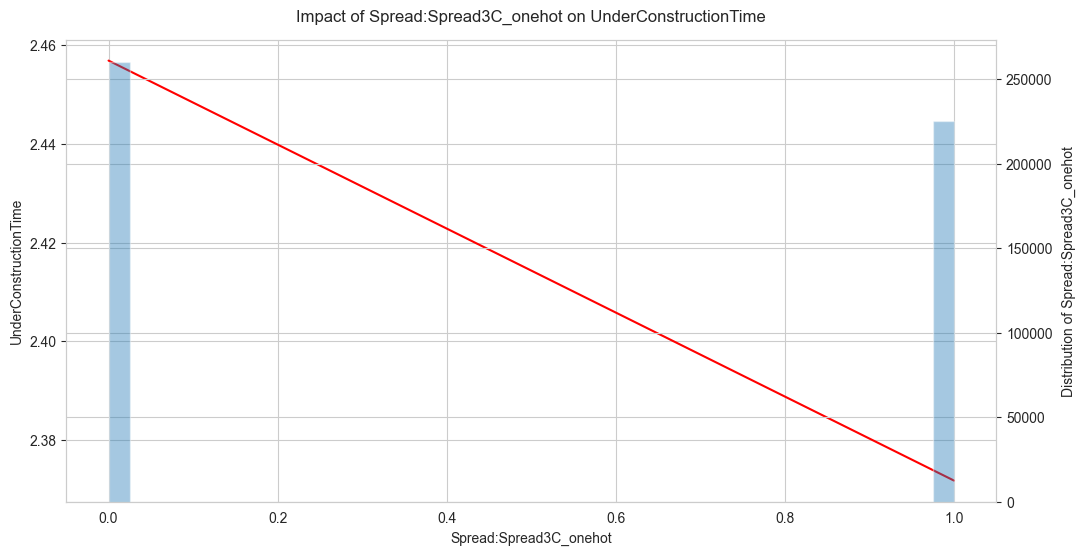

WZ_TransLenEnd -> min = 300.0 max = 1042.5


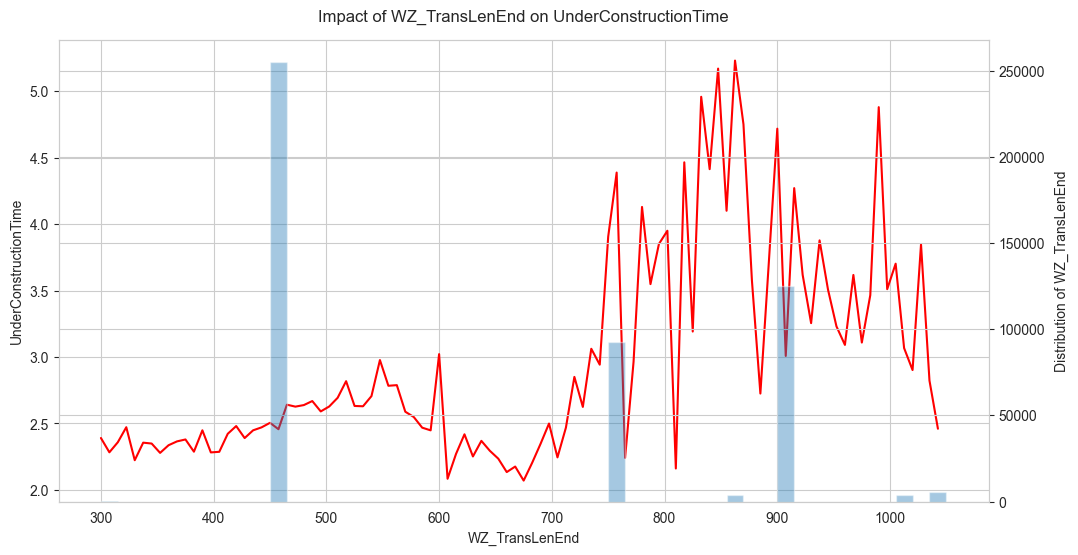

CreatedDate:Season_Code -> min = 2.0 max = 2.989999999999979


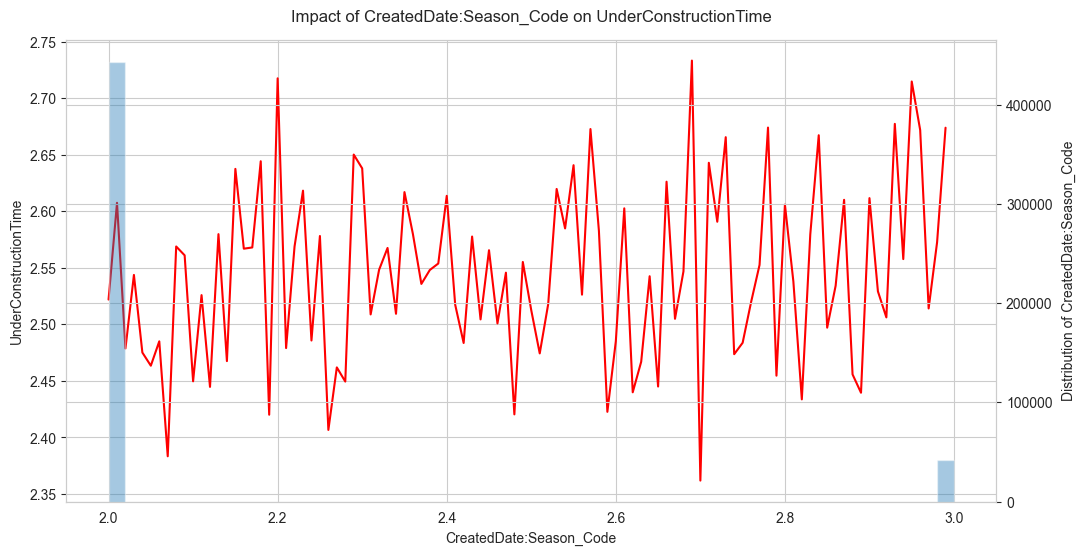

TrafficImpact:Low_onehot -> min = 0 max = 1


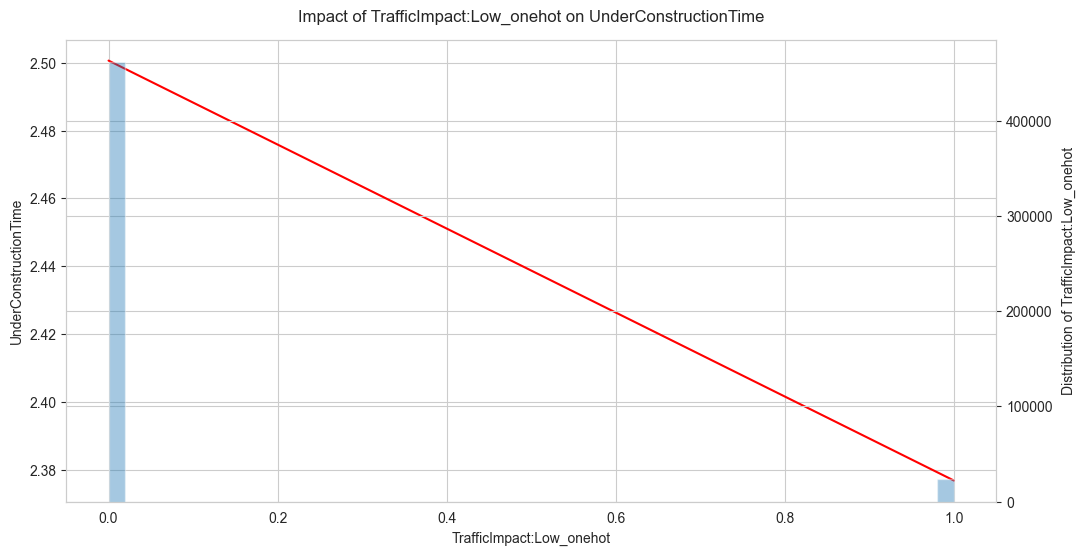

Weather:Temp -> min = -6.1 max = 22.80799999999998


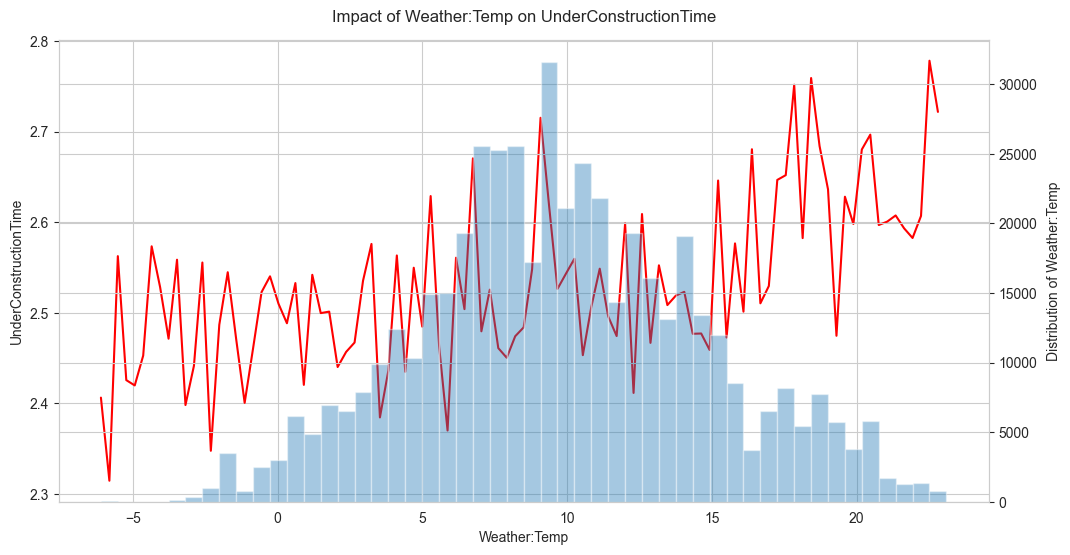

WZ_IsOrigIDivided -> min = 0 max = 1


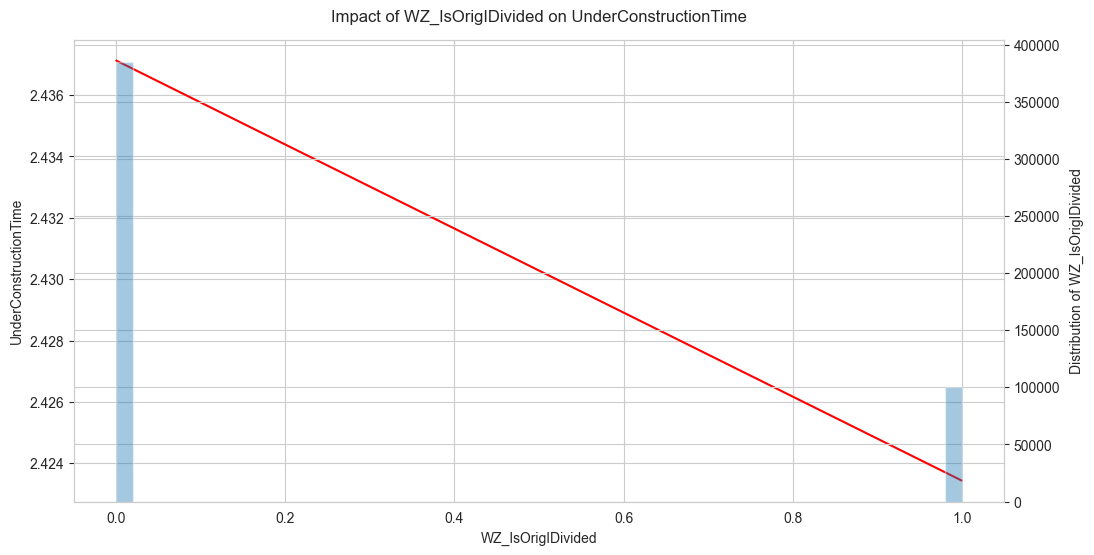

WZ_ConstSignSpdLimDist -> min = 150.0 max = 298.5


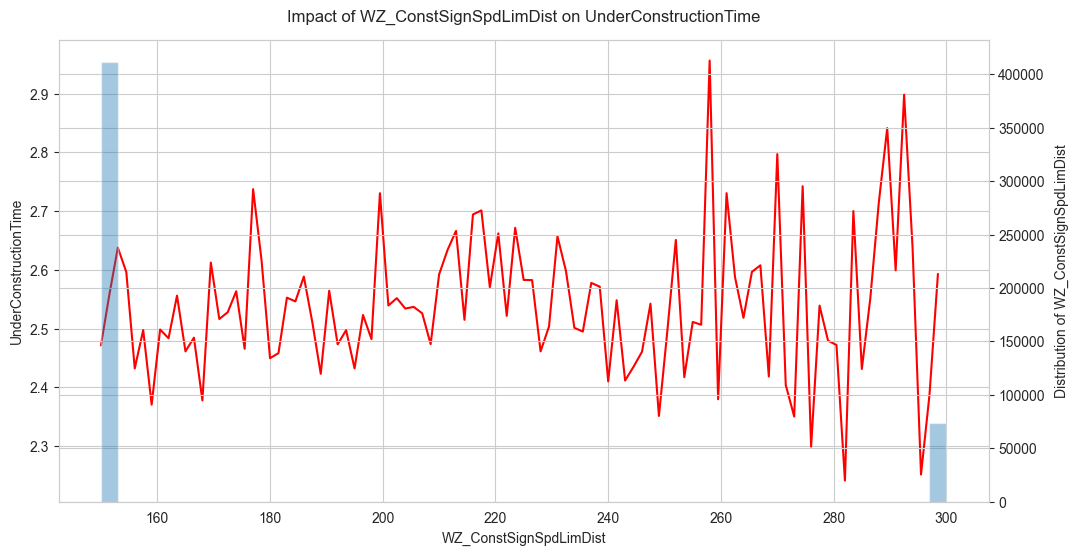

WZ_IsMinAprch -> min = 0 max = 1


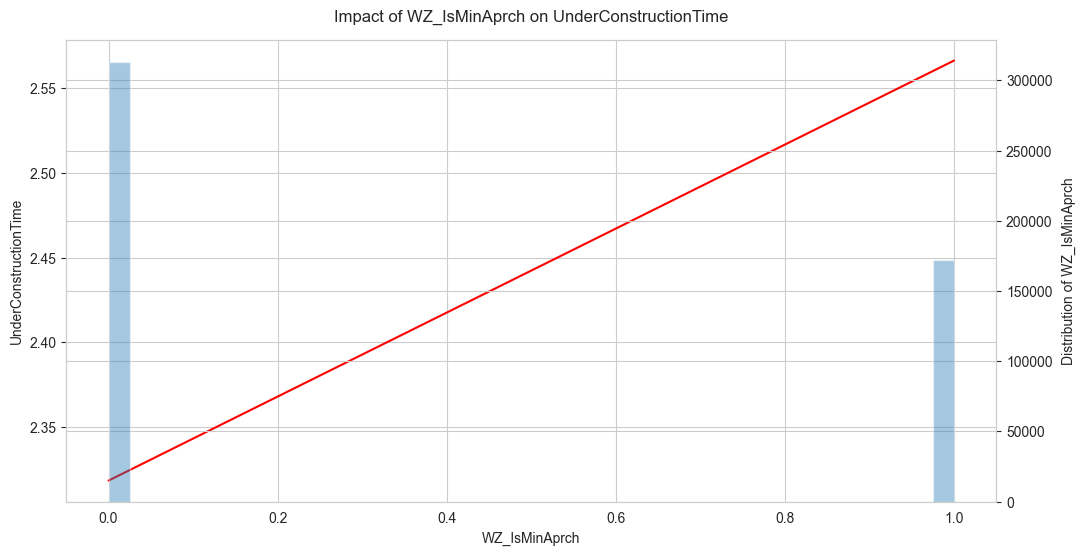

Spread:Spread3B_onehot -> min = 0 max = 1


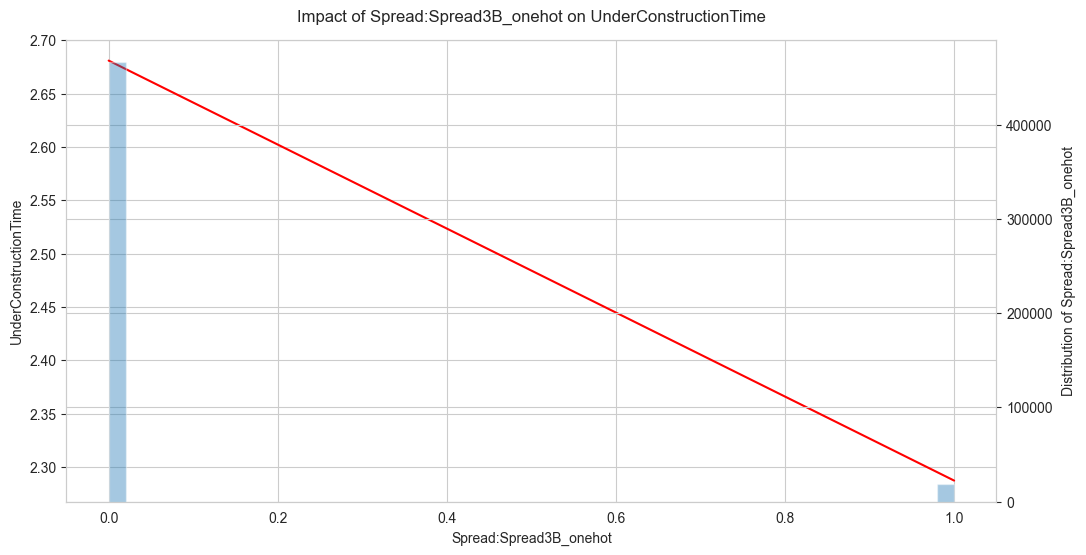

WZ_IsBidirectional -> min = 0 max = 1


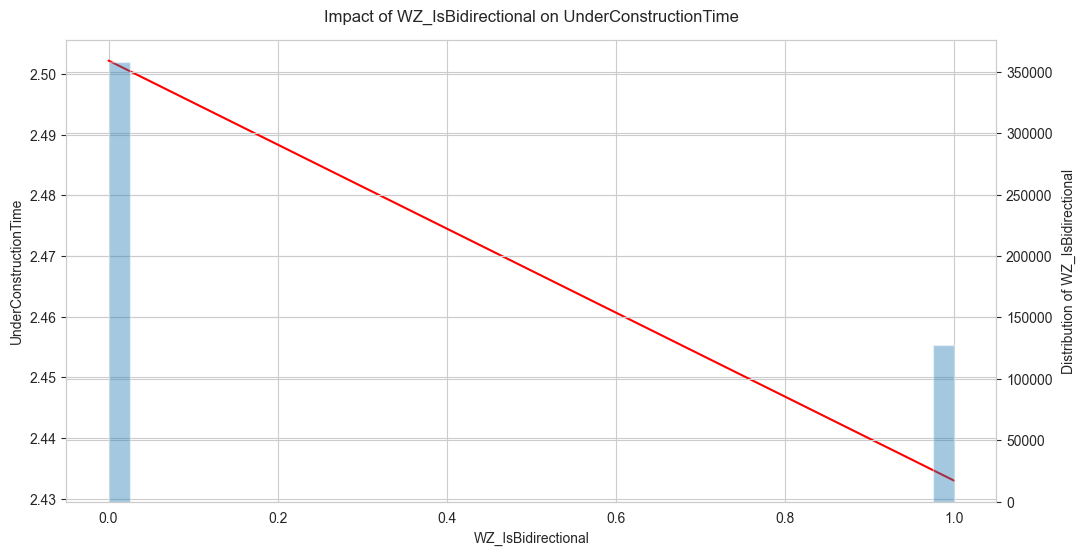

WZ_SpdLim -> min = 50.0 max = 69.80000000000028


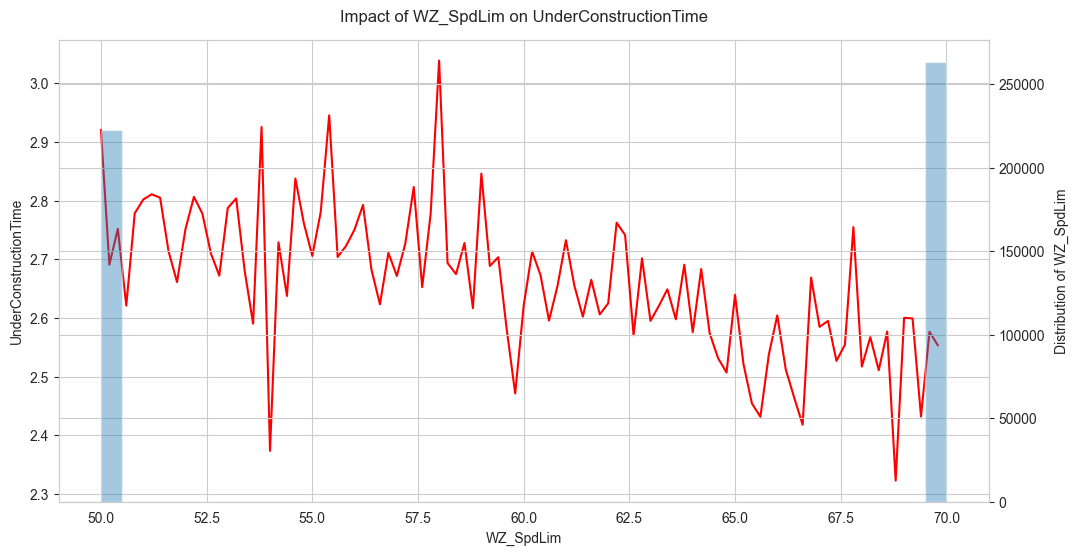

Weather:WindSpd -> min = 0.0 max = 24.75


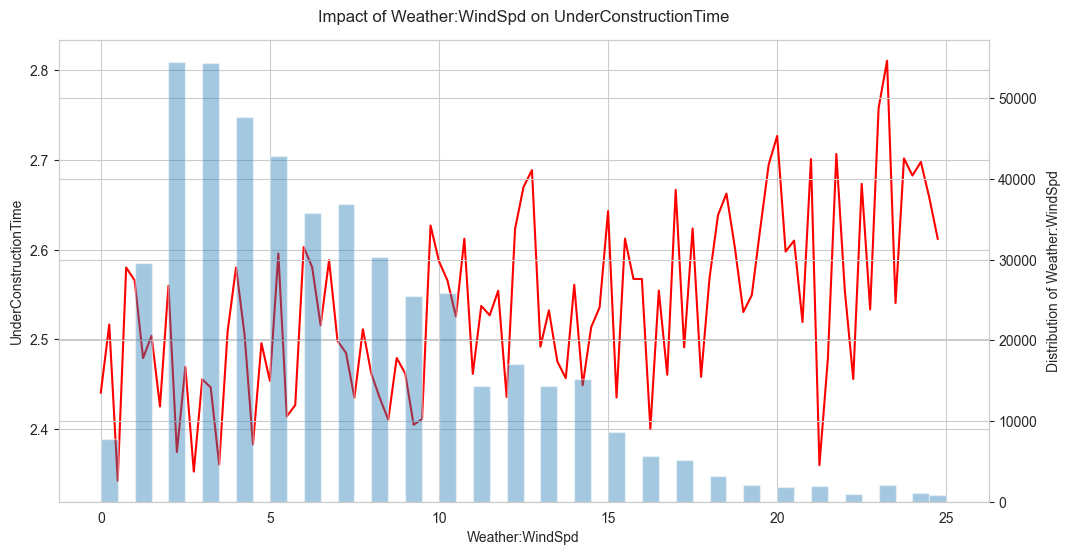

In [139]:
import warnings
import re


x = df_processed.filter(x_cols)
y = df_processed.filter(y_cols)

meds = x.median()
mins = x.min()
maxs = x.max()

impact_dict = {}

for i, feature in enumerate(x.columns):
    inputs_list = []

    unique = x[feature].unique()
    if set(unique) == {0, 1}:
        arr = [0, 1]
    else:
        minimum = unique.min()
        maximum = unique.max()
        arr = np.arange(minimum, maximum, (maximum - minimum)/100)

    print(feature, '-> min =', min(arr), 'max =', max(arr))

    for variation in arr:
        inputs = list(meds.values)
        inputs[i] = variation

        inputs_list.append(inputs)

    inputs_list = np.array(inputs_list)
    inputs_tensor = torch.tensor(inputs_list, dtype=torch.float32)

    with torch.inference_mode():
        preds = model(inputs_tensor).flatten().detach().numpy()

    impact_dict[feature] = abs(preds.max() - preds.min())

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        warnings.warn("deprecated", DeprecationWarning)

        fig = plt.figure(figsize=(12, 6))
        sns.lineplot(x=inputs_tensor[:, i].flatten(), y=preds, color='r')
        plt.xlabel(feature)
        plt.ylabel(y_cols[0])
        # plt.ylim(1, 8)
        plt.twinx()
        sns.distplot(x[feature], kde=False) #bins=10
        plt.ylabel(f"Distribution of {feature}", labelpad=7)
        plt.title(f"Impact of {feature} on {y_cols[0]}", pad=13)

        pattern = re.compile('[^a-zA-Z]')
        filename = re.sub(pattern, '', feature)

        fig.savefig(os.path.join(output_root_path, f'{filename}_impact.png'))
        plt.show()

# fig = plt.figure(figsize=(30, 20))
# plt.show()

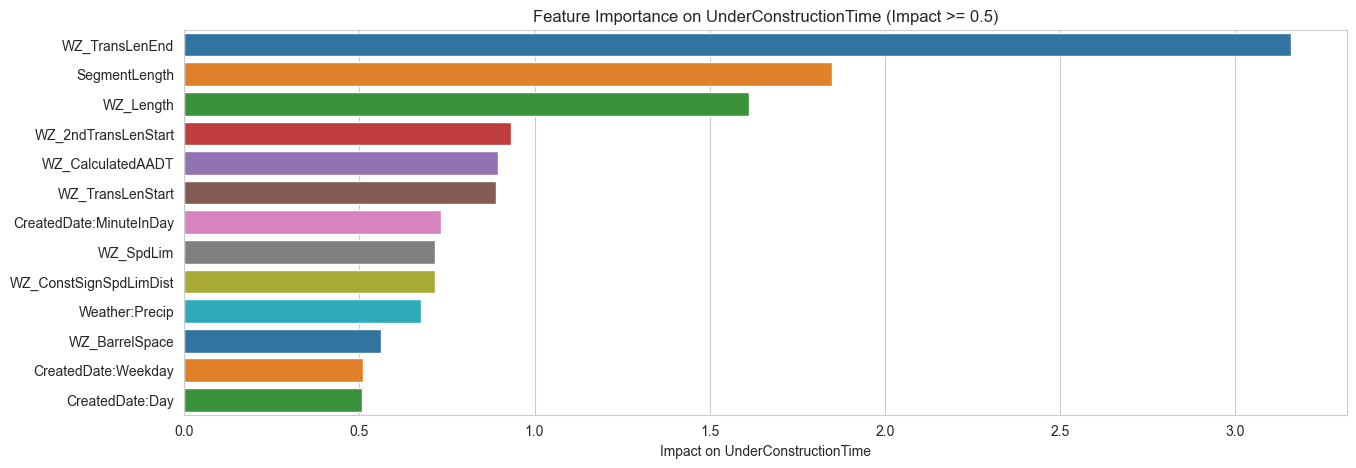

In [141]:
impact_dict = dict(sorted(impact_dict.items(), key=lambda pair: pair[1], reverse=True))
impact_threshold = 0.5
filtered_dict = {k: v for k, v in impact_dict.items() if v >= impact_threshold}

categories = list(filtered_dict.keys())
values = list(filtered_dict.values())

fig = plt.figure(figsize=(15, 5))
sns.barplot(x=values, y=categories,  palette='tab10')
plt.xlabel(f"Impact on {y_cols[0]}")
# plt.legend().remove()
plt.title(f"Feature Importance on {y_cols[0]} (Impact >= {impact_threshold})")

fig.savefig(os.path.join(output_root_path, 'feature_importance.png'))
plt.show()


# Tensorflow

In [114]:
# model = Sequential()
#
# model.add(Dense(units=128, input_dim=x_train.shape[1], activation='relu'))
#
# model.add(Dense(units=512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=256, activation='relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.5))
#
# # Output layer
# # model.add(Dense(units=2, activation='tanh'))
# # model.add(Dense(units=2, activation='sigmoid'))
# # model.add(Dense(units=2))
# model.add(Dense(units=1))
#
# model.compile(optimizer='adam', loss='mse')
#
# model.summary()

In [115]:
# # logdir = "../logs/" + datetime.now().strftime("%d-%H_%M")
# # tensorboard_callback = TensorBoard(log_dir=logdir)
# # tensorboard_callback = TensorBoard(log_dir=logdir,
# #                                    histogram_freq=1,
# #                                    write_graph=True,
# #                                    write_images=True,
# #                                    update_freq='epoch',
# #                                    profile_batch=2,
# #                                    embeddings_freq=1)
# earlystopping_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [116]:
# # model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test), callbacks=[tensorboard_callback, earlystopping_callback], verbose=1)
#
# history = model.fit(x_train, y_train, epochs=2000, batch_size=1024, validation_data=(x_test, y_test),
#                     callbacks=[earlystopping_callback], verbose=1)


In [117]:
def plot_performance(history):
    # print(history.history.keys())
    plt.title('model loss')
    plt.plot(history.history['loss'], 'b-o')
    plt.plot(history.history['val_loss'], 'r-X')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.grid()
    plt.show()

In [118]:
# plot_performance(history)

In [119]:
# %tensorboard --logdir logs

In [120]:
# y_pred = model.predict(x_train[-set_aside:])
# r2_score(y_train[-set_aside:], y_pred)

In [121]:
# y_pred = model.predict(x_test)

In [122]:
# # ape = tf.abs((y_test - y_pred) / y_test)
# # mape = tf.reduce_mean(ape) * 100.0
# # print("MAPE:", mape.numpy())
#
# squared_error = tf.square(y_test - y_pred)
# mse = tf.reduce_mean(squared_error)
# print("MSE:", mse.numpy())
# rmse = tf.sqrt(mse)
# print("RMSE:", rmse.numpy())
#
# r2 = r2_score(y_test, y_pred)
# print("R2 Score:", r2)

In [ ]:
# y_pred = model.predict(x_test)
# r2_score(y_test, y_pred)

## Save

In [ ]:
# model.save(os.path.join(output_root_path, "trained_model", datetime.now().strftime("model_%d-%H_%M")))
# model.save_weights(os.path.join(output_root_path, "trained_model/" + datetime.now().strftime("model_%m_%d-%H_%M"),
#                                 datetime.now().strftime("model_%d-%H_%M")))

In [ ]:
# model.save("my_model.h5")